## DATA ANALYSIS ON STROKE PREDICTION 

## 1.1 TITLE & OBJECTIVE OF THE STUDY 

The project titled “DATA ANALYSIS ON STROKE PREDICTION” is under category “Healthcare”, which inspects the patient’s medical information performed across various hospitals. The project primarily focuses on the causes that leads to stroke, which is a binary classification done by using ML- Supervised classification algorithms and predicting. OBJECTIVE:  Determine whether the patient has a Stroke or not  Implementation of supervised ML classification Algorithms

## 1.2 NEED OF THE STUDY

29 October is observed as World Stroke Day. This day aims at spreading awareness about the fatal condition of stroke. This complication is caused due to the reduced or interrupted blood flow in the brain. This leads to insufficient nutrient and oxygen supply in the brain causing it to dysfunctional and damage. It is important to spread awareness about this condition as early detection and treatment is the only way of ensuring safe recovery and preventing fatality. In this Project, 11 clinical features like hypertension,heart disease,glucose level, BMI and so on are obtained for predicting stroke events.

## 1.3 PROBLEM STATEMENT 
Predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relevant information about the patient.Perform necessary exploratory data analysis before building the model and evaluate the model based on performance metrics other than model accuracy

## 1.4 DATASET DESCRIPTION 

The dataset consists of several predictor variables and one target variable, Outcome. Predictor variables includes the age,gender,hypertension,smoking status and so on.,

## 1.5 DATA SOURCES 
The Dataset Stroke Prediction is taken in Kaggle.Kaggle is an AirBnB for Data Scientists. It’s a crowd- sourced platform to attract, nurture, train and challenge data scientists from all around the world to solve data science, machine learning and predictive analytics problems. Kaggle is the number one stop for data science enthusiasts all around the world Domain - Healthcare Format - .CSV(Comma Separated value) File - healthcare-dataset-stroke-data.csv Source link -Stroke Prediction Dataset | Kaggle

## 1.6 ANALYTICS TOOLS
Python Notebook (Jupyter / google Collab)

## 1.7 ANALYTICS APPROACH 
Model Build with Random Forest Classifier (RF) 

Model Build with Support Vector Machine (SVM) 

Model Build with Decision Tree Classifier (DT) 

Model Build with K-Nearest Neighbour (KNN) 

Model build with Gradient Boosting Method (GBM) 

Model Build with Extreme Gradient Boosting (XGB) 

Model Build with Adaboost (AB)

## 1.LIBRARIES NEEDED IN THE STUDY 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import pyforest
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, StandardScaler, PowerTransformer, MinMaxScaler, LabelEncoder, RobustScaler
from sklearn.model_selection import RepeatedStratifiedKFold, KFold, cross_val_predict, train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.metrics import plot_confusion_matrix, r2_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostClassifier
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif, f_regression, mutual_info_regression
from xgboost import XGBRegressor, XGBClassifier
from xgboost import plot_importance
from sklearn.pipeline import Pipeline
from sklearn.tree import plot_tree
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)

# pd.set_option('display.max_rows', 100) # if you wish to see more rows rather than default, just uncomment this line.
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import colorama
from colorama import Fore, Style  # maakes strings colored
# !pip3 install termcolor
from termcolor import colored

### 1.1 User Defined Functions 

In [2]:
# Function for determining the number and percentages of missing values

def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

In [124]:
# Function for comparing different approaches

def score_dataset(X_train, X_valid, y_train, y_valid):
    model = SVC(class_weight = "balanced", random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return accuracy_score(y_valid, preds)

In [123]:
# Function for insighting summary information about the column
def first_looking(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()/df.shape[0]*100, 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print(df[col].value_counts(dropna = False))

In [3]:
# Function for examining scores

def train_val(y_train, y_train_pred, y_test, y_pred):
    
    scores = {"train_set": {"Accuracy" : accuracy_score(y_train, y_train_pred),
                            "Precision" : precision_score(y_train, y_train_pred),
                            "Recall" : recall_score(y_train, y_train_pred),                          
                            "f1" : f1_score(y_train, y_train_pred)},
    
              "test_set": {"Accuracy" : accuracy_score(y_test, y_pred),
                           "Precision" : precision_score(y_test, y_pred),
                           "Recall" : recall_score(y_test, y_pred),                          
                           "f1" : f1_score(y_test, y_pred)}}
    
    return pd.DataFrame(scores)

## 2.Data 

### 2.1 Context 

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

### 2.2 About the Features

1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not

Note: "Unknown" in smoking_status means that the information is unavailable for this patient

### 2.3 What the Problem is

In the given Dataset, we have a binary classification problem.

We will make a prection on the target variable stroke.

Lastly we will build a variety of Classification models and compare the models giving the best prediction on stroke.

### 2.4 Target Variable

Target variable, in the machine learning context, is the variable that is or should be the output. For example it could be binary 0 or 1 if you are classifying or it could be a continuous variable if you are doing a regression. In statistics you also refer to it as the response variable.

In our Dataset our target variable is Stroke in the contex of determining whether anybody is likely to get Stroke based on the input parameters like gender, age and various test results or not.

## 3.ANALYSIS 

### 3.1 Reading the Data

In [2]:
df0=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df=df0.copy()

In [4]:
df

id  gender    age  hypertension  heart_disease ever_married  \
0      9046    Male 67.000             0              1          Yes   
1     51676  Female 61.000             0              0          Yes   
2     31112    Male 80.000             0              1          Yes   
3     60182  Female 49.000             0              0          Yes   
4      1665  Female 79.000             1              0          Yes   
...     ...     ...    ...           ...            ...          ...   
5105  18234  Female 80.000             1              0          Yes   
5106  44873  Female 81.000             0              0          Yes   
5107  19723  Female 35.000             0              0          Yes   
5108  37544    Male 51.000             0              0          Yes   
5109  44679  Female 44.000             0              0          Yes   

          work_type Residence_type  avg_glucose_level    bmi   smoking_status  \
0           Private          Urban            228.690 36.600  formerly smoked   
1     Self-employed          Rural            202.210    NaN     never smoked   
2           Private          Rural            105.920 32.500     never smoked   
3           Private          Urban            171.230 34.400           smokes   
4     Self-employed          Rural            174.120 24.000     never smoked   
...             ...            ...                ...    ...              ...   
5105        Private          Urban             83.750    NaN     never smoked   
5106  Self-employed          Urban            125.200 40.000     never smoked   
5107  Self-employed          Rural             82.990 30.600     never smoked   
5108        Private          Rural            166.290 25.600  formerly smoked   
5109       Govt_job          Urban             85.280 26.200          Unknown   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0  

[5110 rows x 12 columns]

## 4) EXPLORATORY DATA ANALYSIS (EDA) & VISUALIZATION

### 4.1 - A General Looking at the Data

In [129]:
#Check for top 5 datas using .head()

In [130]:
df.head()

id  gender    age  hypertension  heart_disease ever_married  \
0   9046    Male 67.000             0              1          Yes   
1  51676  Female 61.000             0              0          Yes   
2  31112    Male 80.000             0              1          Yes   
3  60182  Female 49.000             0              0          Yes   
4   1665  Female 79.000             1              0          Yes   

       work_type Residence_type  avg_glucose_level    bmi   smoking_status  \
0        Private          Urban            228.690 36.600  formerly smoked   
1  Self-employed          Rural            202.210    NaN     never smoked   
2        Private          Rural            105.920 32.500     never smoked   
3        Private          Urban            171.230 34.400           smokes   
4  Self-employed          Rural            174.120 24.000     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [131]:
#Check for last 5 datas using .tail()

In [132]:
df.tail()

id  gender    age  hypertension  heart_disease ever_married  \
5105  18234  Female 80.000             1              0          Yes   
5106  44873  Female 81.000             0              0          Yes   
5107  19723  Female 35.000             0              0          Yes   
5108  37544    Male 51.000             0              0          Yes   
5109  44679  Female 44.000             0              0          Yes   

          work_type Residence_type  avg_glucose_level    bmi   smoking_status  \
5105        Private          Urban             83.750    NaN     never smoked   
5106  Self-employed          Urban            125.200 40.000     never smoked   
5107  Self-employed          Rural             82.990 30.600     never smoked   
5108        Private          Rural            166.290 25.600  formerly smoked   
5109       Govt_job          Urban             85.280 26.200          Unknown   

      stroke  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0

In [133]:
#check for random datas using .sample()

In [134]:
df.sample(10)

id  gender    age  hypertension  heart_disease ever_married  \
4895  28717  Female 56.000             1              0          Yes   
1949  40371  Female 47.000             0              0          Yes   
899   68438  Female 51.000             0              0          Yes   
566   36942    Male 27.000             0              0           No   
4742   5319    Male 48.000             0              0          Yes   
2727  24832  Female 65.000             0              0          Yes   
5099   7293    Male 40.000             0              0          Yes   
4400  68059    Male 35.000             0              0          Yes   
362   49916    Male 76.000             0              0          Yes   
1489  30746  Female 30.000             0              0          Yes   

          work_type Residence_type  avg_glucose_level    bmi   smoking_status  \
4895        Private          Rural            177.560 30.100     never smoked   
1949        Private          Urban             62.470 26.500     never smoked   
899         Private          Rural             90.780 32.300     never smoked   
566         Private          Urban            114.790 32.000          Unknown   
4742        Private          Rural             98.240 34.600     never smoked   
2727  Self-employed          Urban             77.460 30.900  formerly smoked   
5099        Private          Rural             83.940    NaN           smokes   
4400       Govt_job          Rural            103.080 41.500           smokes   
362         Private          Rural            110.990 29.800  formerly smoked   
1489        Private          Rural            124.080 41.100          Unknown   

      stroke  
4895       0  
1949       0  
899        0  
566        0  
4742       0  
2727       0  
5099       0  
4400       0  
362        0  
1489       0

In [135]:
#Columns present in the Dataset .columns

In [136]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [137]:
#Check for rows and columns in the dataset using .shape()

In [138]:
print("There is", df.shape[0], "observation and", df.shape[1], "columns in the dataset")

There is 5110 observation and 12 columns in the dataset


In [139]:
#Check for their Count and Datatype using .info()

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Our dataset demonstrates;

• 7 numeric variable including (4) int64 and (3) float64 data types out of 7.

• 5 non-numeric variable including (5) object types out of 5.

• In our dataset, we have both numerical and categorical variables.

• It is critical to determine if the columns are correctly designed.

• For the analysis, it is critical to determine our target (label) variable which is "stroke" in the given data.

• It is critical to determine if stroke is an integer/binary type or not.

• In this dataset, target variable is coded as 1 for positive cases (having stroke) and 0 for negative cases (not having stroke).

• Both Hypertension and heart disease have integer data types, not as an object.

• Like our Target variable (stroke), both hypertension and heart_disease are coded as 1 for the positive cases and 0 for negative cases.

• In addition, we have 5 categorical variables, which needs to be converted to Label Encoder.

In [141]:
#Statistical summary using .describe()

In [142]:
#Numerical datatype
df.describe().T

count      mean       std    min       25%       50%  \
id                5110.000 36517.829 21161.722 67.000 17741.250 36932.000   
age               5110.000    43.227    22.613  0.080    25.000    45.000   
hypertension      5110.000     0.097     0.297  0.000     0.000     0.000   
heart_disease     5110.000     0.054     0.226  0.000     0.000     0.000   
avg_glucose_level 5110.000   106.148    45.284 55.120    77.245    91.885   
bmi               4909.000    28.893     7.854 10.300    23.500    28.100   
stroke            5110.000     0.049     0.215  0.000     0.000     0.000   

                        75%       max  
id                54682.000 72940.000  
age                  61.000    82.000  
hypertension          0.000     1.000  
heart_disease         0.000     1.000  
avg_glucose_level   114.090   271.740  
bmi                  33.100    97.600  
stroke                0.000     1.000

In [143]:
#Object Datatype
df.describe(include='object').T

count unique           top  freq
gender          5110      3        Female  2994
ever_married    5110      2           Yes  3353
work_type       5110      5       Private  2925
Residence_type  5110      2         Urban  2596
smoking_status  5110      4  never smoked  1892

In [144]:
#Check for unique datas in each column using .nunique()

In [145]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [149]:
# to find how many unique values numeric features have

In [147]:
for col in df.select_dtypes(include=[np.number]).columns:
    print(f"{col} has {df[col].nunique()} unique value")

id has 5110 unique value
age has 104 unique value
hypertension has 2 unique value
heart_disease has 2 unique value
avg_glucose_level has 3979 unique value
bmi has 418 unique value
stroke has 2 unique value


In [150]:
# to find how many unique values object features have

In [148]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col} has {df[col].nunique()} unique value")

gender has 3 unique value
ever_married has 2 unique value
work_type has 5 unique value
Residence_type has 2 unique value
smoking_status has 4 unique value


In [151]:
#Check for Duplicate Values

In [152]:
df.duplicated().value_counts()

False    5110
dtype: int64

In the given dataset, we have no duplicated rows.

In [153]:
#Check for missing Datas

In [154]:
missing(df)

Missing_Number  Missing_Percent
bmi                           201            0.039
id                              0            0.000
gender                          0            0.000
age                             0            0.000
hypertension                    0            0.000
heart_disease                   0            0.000
ever_married                    0            0.000
work_type                       0            0.000
Residence_type                  0            0.000
avg_glucose_level               0            0.000
smoking_status                  0            0.000
stroke                          0            0.000

In the given dataset, there have been 201 missing values in the column of "bmi". These missing values will be handled with after Train & Split process for preventing data leakage.

In [5]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [6]:
objList1 = df.select_dtypes(include = "object").columns # only columns with object datatypes
print (objList1) 

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


In [7]:
for i in objList1:
    df[i] = LE.fit_transform(df[i].astype(str))

print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int32  
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int32  
 6   work_type          5110 non-null   int32  
 7   Residence_type     5110 non-null   int32  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   int32  
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int32(5), int64(4)
memory usage: 379.4 KB
None


## 4.2 - Data Cleaning

In [9]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

The column of 'Residence_type' begins with uppercase while others are not. To make a standardize grammer to prevent mistake we will change all column names into lowercase

In [10]:
df.columns = df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

In [11]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

#### Before deeping into the analysis it would be benefical to examine the correlation among variables using heatmap

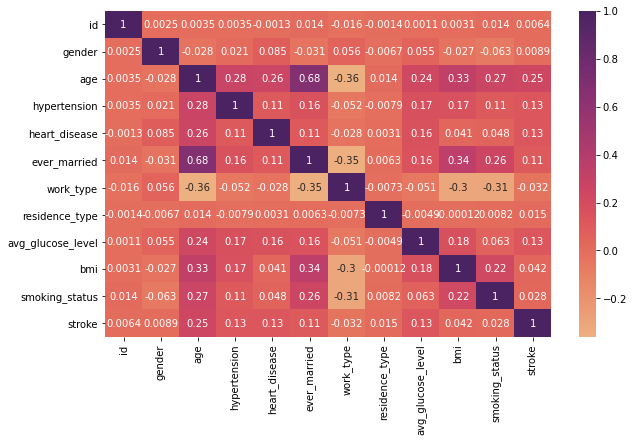

In [12]:
sns.heatmap(df.corr(), annot=True,cmap='flare');

#### Let's split our features into two part, numerical and categorical, for easing our further examination.

In [13]:
numerical= df.drop(['stroke'], axis=1).select_dtypes('number').columns

categorical = df.select_dtypes('object').columns

print("\033[1m", "Numerical Columns:", "\033[0;0m",  numerical)
print("------------------------------------------------------------------------------------------------------------------")
print("\033[1m", "Categorical Columns:", "\033[0;0m", categorical)

 Numerical Columns:  Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')
------------------------------------------------------------------------------------------------------------------
 Categorical Columns:  Index([], dtype='object')


In [14]:
df[numerical].shape

(5110, 11)

In [15]:
df[categorical].shape

(5110, 0)

## 4.3 - Examination of Target Variable

The proportion of target variable is one of the most important things in a classification problem. So let's a close look at how its values are distributed.

In [16]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [17]:
df['stroke'].value_counts(normalize=True)*100

0   95.127
1    4.873
Name: stroke, dtype: float64

In [18]:
y = df['stroke']
print(f'Percentage of patient has a stroke: % {round(y.value_counts(normalize=True)[1]*100,2)} -->\
     ({y.value_counts()[1]} patient)\nPercentage of patient does not have a stroke: % {round(y.value_counts(normalize=True)[0]*100,2)} --> ({y.value_counts()[0]} patient)')

Percentage of patient has a stroke: % 4.87 -->     (249 patient)
Percentage of patient does not have a stroke: % 95.13 --> (4861 patient)


With normalize set to True, we can obtain the relative frequencies by dividing all values by the sum of values.

In this sense, almost %95 of the instances in our target variable haven't experienced with 'stroke' representing 4861 patients.

On the other hand %5 of the instances in our target variable go through 'Stroke' representing 249 patient.

Similarly, it's clear that the proportinate distribution for each class is not the case here. So we should assume an imbalanced data we have in the given case.

In [19]:
first_looking("stroke")

NameError: name 'first_looking' is not defined

0    4861
1     249
Name: stroke, dtype: int64


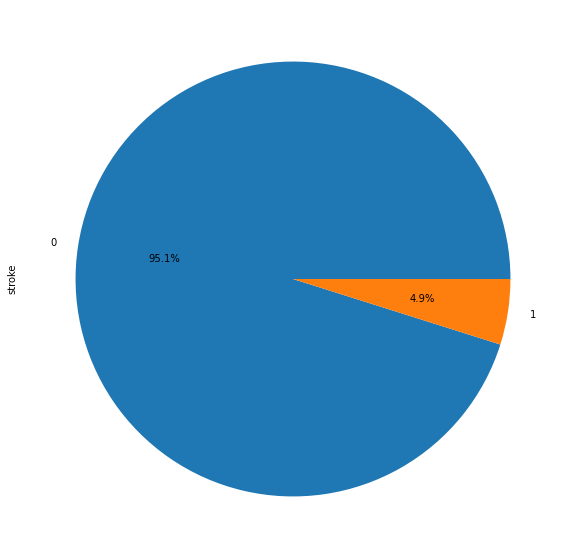

In [20]:
print(df["stroke"].value_counts())
df["stroke"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(10,10));

In [21]:
df['stroke'].describe()

count   5110.000
mean       0.049
std        0.215
min        0.000
25%        0.000
50%        0.000
75%        0.000
max        1.000
Name: stroke, dtype: float64

In [22]:
df[df['stroke']==0].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='GnBu')

In [172]:
df['stroke'].iplot(kind='hist')

## 4.4 - Numerical Features

In [173]:
df[numerical].describe().T    

count      mean       std    min       25%       50%  \
id                5110.000 36517.829 21161.722 67.000 17741.250 36932.000   
age               5110.000    43.227    22.613  0.080    25.000    45.000   
hypertension      5110.000     0.097     0.297  0.000     0.000     0.000   
heart_disease     5110.000     0.054     0.226  0.000     0.000     0.000   
avg_glucose_level 5110.000   106.148    45.284 55.120    77.245    91.885   
bmi               4909.000    28.893     7.854 10.300    23.500    28.100   

                        75%       max  
id                54682.000 72940.000  
age                  61.000    82.000  
hypertension          0.000     1.000  
heart_disease         0.000     1.000  
avg_glucose_level   114.090   271.740  
bmi                  33.100    97.600

In [174]:
df[numerical].iplot(kind='hist');

In [175]:
df[numerical].iplot(kind='histogram',subplots=True,bins=50)

In [176]:
#Boxplot for Continuous Datas

In [177]:
for i in df.drop(columns=["stroke", 'gender', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'smoking_status']).columns:
    df[i].iplot(kind="box", title=i, boxpoints="all",color='Blue')

In [178]:
#Continuous independant Datas with dependant

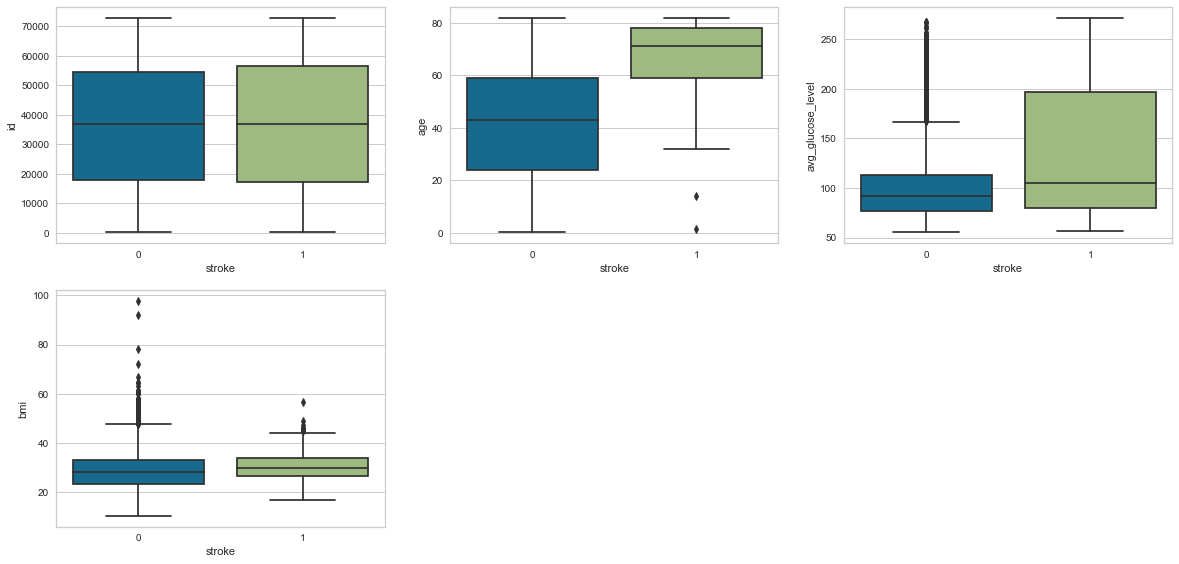

In [179]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.drop(columns=['gender', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'smoking_status']).columns:
    if feature != "stroke":
        index += 1
        plt.subplot(4,3,index)
        sns.boxplot(x='stroke', y=feature, data=df)

In [180]:
fig = px.scatter_3d(df, 
                    x='avg_glucose_level',
                    y='age',
                    z='gender',
                    color='stroke')
fig.show();

#### Removing Undefined data in an column

In the "gender" column there has been an undefined classification which makes no contribution to understand stroke. So let's discard this row from the analysis

In [23]:
df.gender.value_counts()

0    2994
1    2115
2       1
Name: gender, dtype: int64

In [24]:
df.drop(df[df['gender'] == 'Other'].index, inplace = True)

In [25]:
df.shape

(5110, 12)

In [26]:
df.gender.value_counts()

0    2994
1    2115
2       1
Name: gender, dtype: int64

## 4.7 - Categorical Features

In [27]:
df[categorical].head().T

Empty DataFrame
Columns: [0, 1, 2, 3, 4]
Index: []

In [28]:
df[categorical].describe()

ValueError: Cannot describe a DataFrame without columns

#### gender & stroke

In [187]:
first_looking("gender")

column name    :  gender
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2
Female    2994
Male      2115
Name: gender, dtype: int64


In [188]:
print(df.groupby('gender')['stroke'].mean().sort_values())
print()
df.groupby('gender')['stroke'].mean().iplot(kind='histogram',subplots=True,bins=50)

gender
Female   0.047
Male     0.051
Name: stroke, dtype: float64



#### ever_married & stroke

In [189]:
first_looking("ever_married")

column name    :  ever_married
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2
Yes    3353
No     1756
Name: ever_married, dtype: int64


In [190]:
print(df.groupby('ever_married')['stroke'].mean().sort_values())
print()
df.groupby('ever_married')['stroke'].mean().iplot(kind='bar',subplots=True,bins=50)

ever_married
No    0.017
Yes   0.066
Name: stroke, dtype: float64



#### work_type & stroke

In [191]:
first_looking("work_type")

column name    :  work_type
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  5
Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


In [192]:
print(df.groupby('work_type')['stroke'].mean().sort_values())
print()
df.groupby('work_type')['stroke'].mean().iplot(kind='bar',subplots=True,bins=50)

work_type
Never_worked    0.000
children        0.003
Govt_job        0.050
Private         0.051
Self-employed   0.079
Name: stroke, dtype: float64



#### residence_type & stroke

In [193]:
first_looking("residence_type")

column name    :  residence_type
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2
Urban    2596
Rural    2513
Name: residence_type, dtype: int64


In [194]:
print(df.groupby('residence_type')['stroke'].mean().sort_values())
print()
df.groupby('residence_type')['stroke'].mean().iplot(kind='bar',subplots=True,bins=50)

residence_type
Rural   0.045
Urban   0.052
Name: stroke, dtype: float64



#### smoking_status & stroke

In [195]:
first_looking("smoking_status")

column name    :  smoking_status
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  4
never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64


In [196]:
print(df.groupby('smoking_status')['stroke'].mean().sort_values())
print()
df.groupby('smoking_status')['stroke'].mean().iplot(kind='bar',subplots=True,bins=50)

smoking_status
Unknown           0.030
never smoked      0.048
smokes            0.053
formerly smoked   0.079
Name: stroke, dtype: float64



#### Overall plot comparing all independant variable with dependant

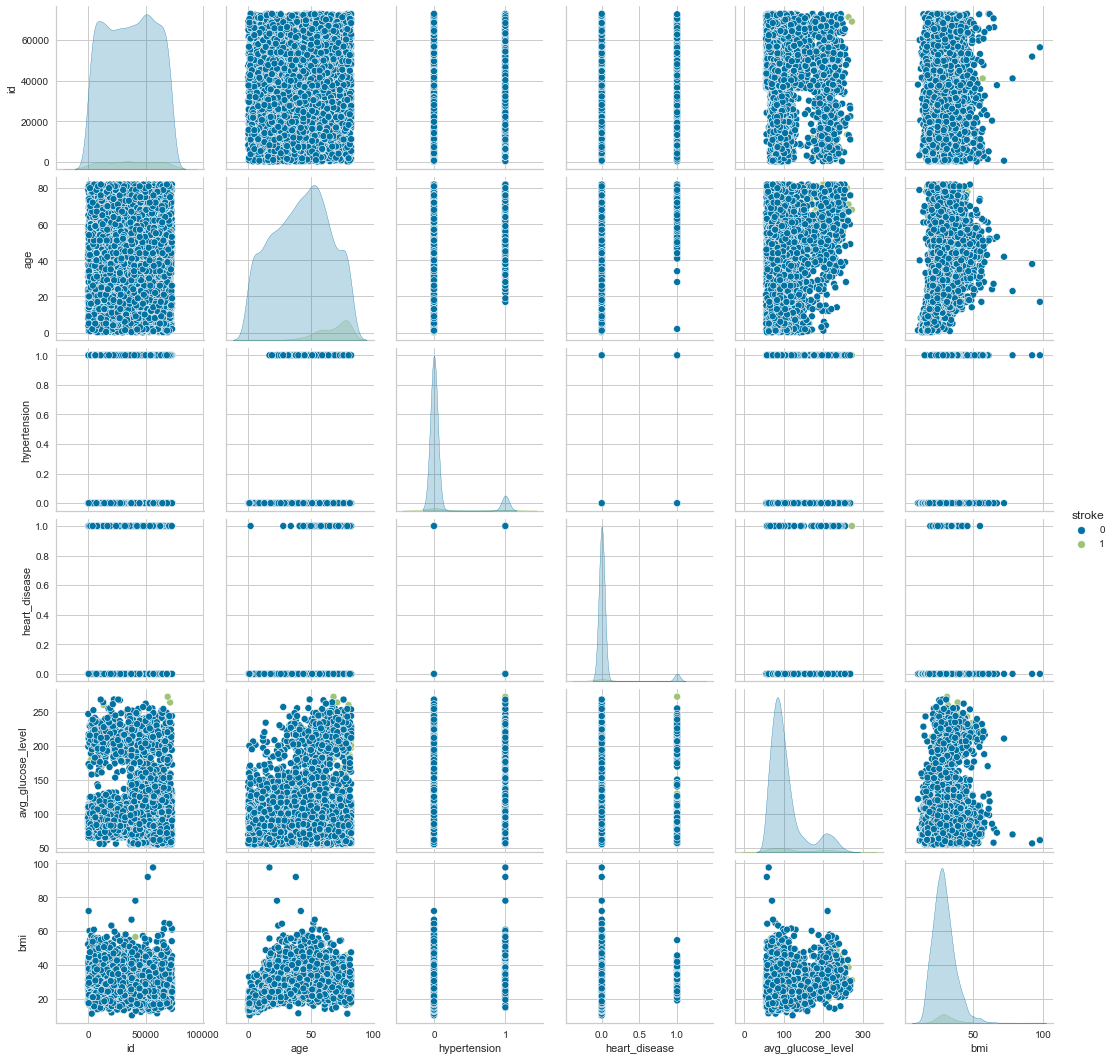

In [197]:
sns.pairplot(df, hue="stroke");

## 4.8 Label Encoder Operation

Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

In [198]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [199]:
for i in df:
    df[i] = LE.fit_transform(df[i].astype(str).values)

In [201]:
df['gender']=LE.fit_transform(df.gender.values)
df['ever_married']=LE.fit_transform(df.ever_married.values)
df['work_type']=LE.fit_transform(df.work_type.values)
df['residence_type']=LE.fit_transform(df.residence_type.values)
df['smoking_status']=LE.fit_transform(df.smoking_status.values)

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 5109 non-null   int32
 1   gender             5109 non-null   int64
 2   age                5109 non-null   int32
 3   hypertension       5109 non-null   int32
 4   heart_disease      5109 non-null   int32
 5   ever_married       5109 non-null   int64
 6   work_type          5109 non-null   int64
 7   residence_type     5109 non-null   int64
 8   avg_glucose_level  5109 non-null   int32
 9   bmi                5109 non-null   int32
 10  smoking_status     5109 non-null   int64
 11  stroke             5109 non-null   int32
dtypes: int32(7), int64(5)
memory usage: 379.2 KB


In [203]:
df.shape

(5109, 12)

#### Check with HeatMap

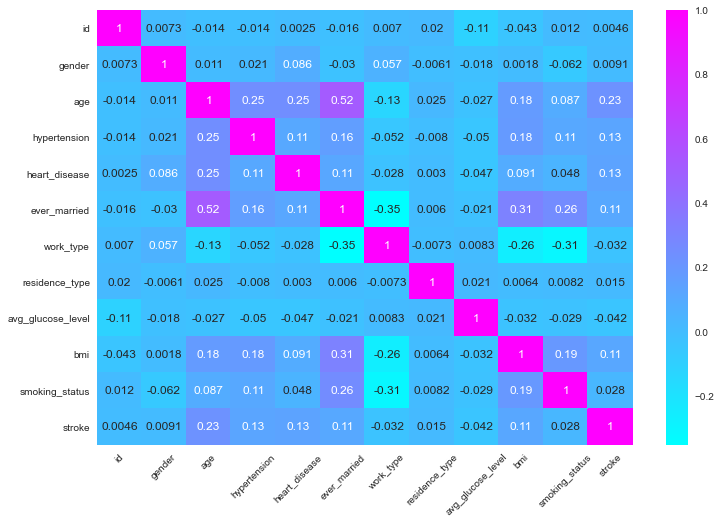

In [204]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True,cmap='cool')
plt.xticks(rotation=45);

## 5) TRAIN | TEST SPLIT & HANDLING WITH MISSING VALUES

### 5.1 Train | Test Split

We must separate the columns (attributes or features) of the dataset into input patterns (X) and output patterns (y)

In [9]:
X = df.drop(["stroke"], axis=1)
y = df["stroke"]

Finally, we can split the X and Y data into a training and test dataset. The training set will be used to prepare the models used in this dataset, the test set will be used to make new predictions, from which we can evaluate the performance of the model.For this we will use the train_test_split() function from the scikit-learn library.

#### Train/Test and split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

SPECIAL NOTE:To prevent data leakage we prefer to handle with 201 missing values stored in "bmi" column after train-test split.

It would be more sensible to fill the missing values in "bmi" column with the median by taking the effects of outliers on mean into consideration.

### 5.2 Handling Missing Values

In [11]:
from sklearn.impute import SimpleImputer

# Imputation
my_imputer = SimpleImputer(missing_values=np.nan, strategy="median")
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_test = pd.DataFrame(my_imputer.transform(X_test))

# Imputation removed column names; put them back
imputed_X_train.columns = X_train.columns
imputed_X_test.columns = X_test.columns

Having imputed train and test sets seperately so that we did not have any data leakage.

In [207]:
X_test = imputed_X_test
X_train = imputed_X_train

In [208]:
missing(X_train)

Missing_Number  Missing_Percent
id                              0            0.000
gender                          0            0.000
age                             0            0.000
hypertension                    0            0.000
heart_disease                   0            0.000
ever_married                    0            0.000
work_type                       0            0.000
Residence_type                  0            0.000
avg_glucose_level               0            0.000
bmi                             0            0.000
smoking_status                  0            0.000

In [209]:
missing(X_test)

Missing_Number  Missing_Percent
id                              0            0.000
gender                          0            0.000
age                             0            0.000
hypertension                    0            0.000
heart_disease                   0            0.000
ever_married                    0            0.000
work_type                       0            0.000
Residence_type                  0            0.000
avg_glucose_level               0            0.000
bmi                             0            0.000
smoking_status                  0            0.000

### 5.3 Scaling

StandardScaler: Assumes that data has normally distributed features and will scale them to zero mean and 1 standard deviation. Use StandardScaler() if you know the data distribution is normal. For most cases StandardScaler would do no harm. Especially when dealing with variance (PCA, clustering, logistic regression, SVMs, perceptron's, neural networks) in fact Standard Scaler would be very important. On the other hand it will not make much of a difference if you are using tree based classifiers or regressors.

MinMaxScaler : This will transform each value in the column proportionally within the range [0,1]. This is quite acceptable in cases where we are not concerned about the standardization along the variance axes. e.g. image processing or neural networks expecting values between 0 to 1.

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 6) Modeling

### 6.1 Implementation of Random Forest Classifier (RF)

### 6.1.a Modelling Random Forest (RF) with Default Parameters

[[970   1]
 [ 49   2]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       971
           1       0.67      0.04      0.07        51

    accuracy                           0.95      1022
   macro avg       0.81      0.52      0.52      1022
weighted avg       0.94      0.95      0.93      1022

--------------------------------------------------------


train_set  test_set
Accuracy       1.000     0.951
Precision      1.000     0.667
Recall         1.000     0.039
f1             1.000     0.074

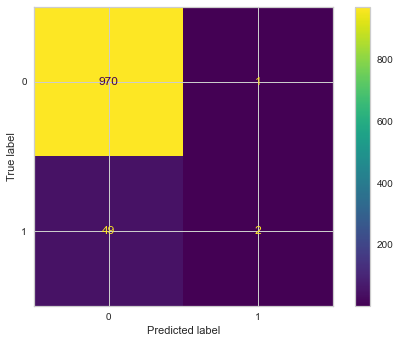

In [210]:
RF_model = RandomForestClassifier(class_weight="balanced", random_state=101)
RF_model.fit(X_train_scaled, y_train)
y_pred = RF_model.predict(X_test_scaled)
y_train_pred = RF_model.predict(X_train_scaled)

rf_f1 = f1_score(y_test, y_pred)
rf_acc = accuracy_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(RF_model, X_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

### 6.1.b Cross-Validating Random Forest (RF)

In [211]:
rf_xvalid_model = RandomForestClassifier(max_depth=None, random_state=101)

rf_xvalid_model_scores = cross_validate(rf_xvalid_model, X_train_scaled, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)
rf_xvalid_model_scores = pd.DataFrame(rf_xvalid_model_scores, index = range(1, 11))

rf_xvalid_model_scores

fit_time  score_time  test_accuracy  test_precision  test_recall  test_f1
1      0.552       0.032          0.954           1.000        0.050    0.095
2      0.568       0.032          0.954           0.667        0.100    0.174
3      0.607       0.024          0.954           1.000        0.050    0.095
4      0.568       0.024          0.949           0.000        0.000    0.000
5      0.571       0.024          0.954           1.000        0.050    0.095
6      0.569       0.024          0.951           0.000        0.000    0.000
7      0.584       0.024          0.949           0.000        0.000    0.000
8      0.576       0.024          0.949           0.333        0.050    0.087
9      0.596       0.024          0.953           0.000        0.000    0.000
10     0.584       0.033          0.953           0.000        0.000    0.000

In [212]:
rf_xvalid_model_scores.mean()[2:]

test_accuracy    0.952
test_precision   0.400
test_recall      0.030
test_f1          0.055
dtype: float64

### 6.1.c Modelling Random Forest (RF) with Best Parameters Using GridSeachCV

In [213]:
param_grid = {'n_estimators':[50, 100, 300],
             'max_features':[2, 3, 4],
             'max_depth':[3, 5, 7, 9],
             'min_samples_split':[2, 5, 8]}

In [214]:
RF_grid_model = RandomForestClassifier(random_state=101)

RF_grid_model = GridSearchCV(estimator=RF_grid_model, 
                             param_grid=param_grid, 
                             scoring = "recall", 
                             n_jobs = -1, verbose = 2).fit(X_train_scaled, y_train)  # Whatch out, fit() can also be used here

Fitting 5 folds for each of 108 candidates, totalling 540 fits


#### Let's look at the best parameters & estimator found by GridSearchCV.

In [215]:
print(colored('\033[1mBest Parameters of GridSearchCV for Random Forest Model:\033[0m', 'blue'), colored(RF_grid_model.best_params_, 'cyan'))
print("--------------------------------------------------------------------------------------------------------------------")
print(colored('\033[1mBest Estimator of GridSearchCV for Random Forest Model:\033[0m', 'blue'), colored(RF_grid_model.best_estimator_, 'cyan'))

Best Parameters of GridSearchCV for Random Forest Model: {'max_depth': 9, 'max_features': 4, 'min_samples_split': 2, 'n_estimators': 100}
--------------------------------------------------------------------------------------------------------------------
Best Estimator of GridSearchCV for Random Forest Model: RandomForestClassifier(max_depth=9, max_features=4, random_state=101)


[[970   1]
 [ 49   2]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       971
           1       0.67      0.04      0.07        51

    accuracy                           0.95      1022
   macro avg       0.81      0.52      0.52      1022
weighted avg       0.94      0.95      0.93      1022

--------------------------------------------------------


train_set  test_set
Accuracy       0.966     0.951
Precision      1.000     0.667
Recall         0.288     0.039
f1             0.447     0.074

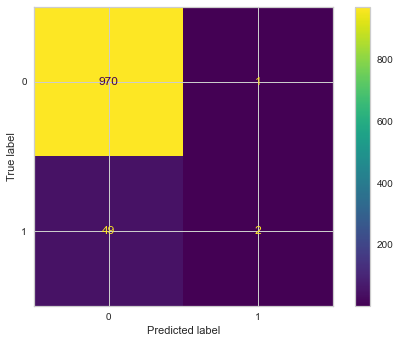

In [25]:
y_pred = RF_grid_model.predict(X_test_scaled)
y_train_pred = RF_grid_model.predict(X_train_scaled)

rf_grid_f1 = f1_score(y_test, y_pred)
rf_grid_acc = accuracy_score(y_test, y_pred)
rf_grid_recall = recall_score(y_test, y_pred)
rf_grid_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(RF_grid_model, X_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

### 6.1.d Feature Importance for Random Forest (RF) Model

In [216]:
RF_model.feature_importances_

array([0.12746008, 0.01898404, 0.3464609 , 0.02532653, 0.01590738,
       0.04056944, 0.05011971, 0.01629571, 0.14298994, 0.17241289,
       0.04347338])

In [217]:
RF_feature_imp = pd.DataFrame(index = X.columns, data = RF_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
RF_feature_imp

Feature Importance
age                             0.346
bmi                             0.172
avg_glucose_level               0.143
id                              0.127
work_type                       0.050
smoking_status                  0.043
ever_married                    0.041
hypertension                    0.025
gender                          0.019
Residence_type                  0.016
heart_disease                   0.016

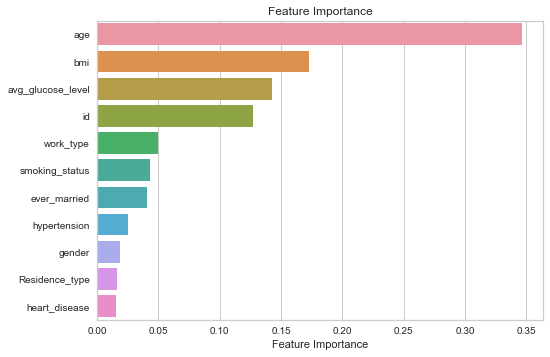

In [218]:
sns.barplot(x=RF_feature_imp["Feature Importance"], y=RF_feature_imp.index)
plt.title("Feature Importance")
plt.show()

### 6.1.e ROC (Receiver Operating Curve) and AUC (Area Under Curve)

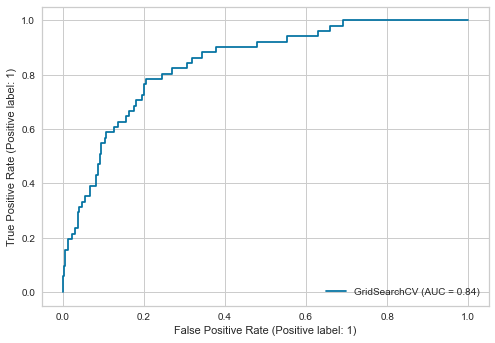

In [219]:
plot_roc_curve(RF_grid_model, X_test_scaled, y_test);

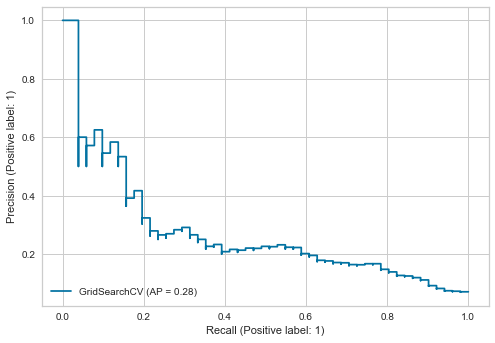

In [220]:
plot_precision_recall_curve(RF_grid_model, X_test_scaled, y_test);

## 6.2 Implementation of Support Vector Machine (SVM)

### 6.2.a Modelling Support Vector Machine (SVM) with Default Parameters

In [225]:
svm_model_scaled = SVC(class_weight = "balanced")
svm_model_scaled.fit(X_train_scaled, y_train)
y_pred = svm_model_scaled.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[738 233]
 [ 15  36]]
              precision    recall  f1-score   support

           0       0.98      0.76      0.86       971
           1       0.13      0.71      0.22        51

    accuracy                           0.76      1022
   macro avg       0.56      0.73      0.54      1022
weighted avg       0.94      0.76      0.82      1022



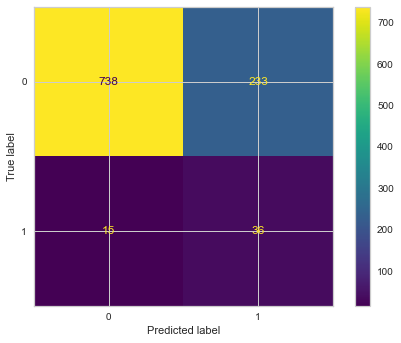

In [226]:
plot_confusion_matrix(svm_model_scaled, X_test_scaled, y_test);

### 6.2.b Cross-Validating Support Vector Machine(SVM)

In [227]:
svm_xvalid_model = SVC()

svm_xvalid_model_scores = cross_validate(svm_xvalid_model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
svm_xvalid_model_scores = pd.DataFrame(svm_xvalid_model_scores, index = range(1, 11))

svm_xvalid_model_scores

fit_time  score_time  test_accuracy  test_precision  test_recall  test_f1
1      0.268       0.056          0.951           0.000        0.000    0.000
2      0.296       0.056          0.951           0.000        0.000    0.000
3      0.283       0.056          0.951           0.000        0.000    0.000
4      0.266       0.056          0.951           0.000        0.000    0.000
5      0.280       0.056          0.951           0.000        0.000    0.000
6      0.264       0.056          0.951           0.000        0.000    0.000
7      0.296       0.056          0.951           0.000        0.000    0.000
8      0.264       0.064          0.951           0.000        0.000    0.000
9      0.312       0.064          0.953           0.000        0.000    0.000
10     0.380       0.056          0.953           0.000        0.000    0.000

In [228]:
model = SVC(class_weight = "balanced")

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy    0.751
test_precision   0.123
test_recall      0.671
test_f1          0.207
dtype: float64

### 6.2.c Modelling Support Vector Machine (SVM) with Best Parameters Using GridSeachCV

In [229]:
from sklearn.model_selection import GridSearchCV

In [230]:
param_grid = {'C': [0.1,1, 10, 100, 1000],
              'gamma': ["scale", "auto", 1,0.1,0.01,0.001,0.0001],
              'kernel': ['rbf', 'linear']}

In [231]:
model = SVC(class_weight = "balanced")
svm_model_grid = GridSearchCV(model, param_grid, verbose=3, refit=True)

In [232]:
svm_model_grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV 1/5] END .................C=0.1, gamma=scale, kernel=rbf; total time=   1.0s
[CV 2/5] END .................C=0.1, gamma=scale, kernel=rbf; total time=   0.9s
[CV 3/5] END .................C=0.1, gamma=scale, kernel=rbf; total time=   0.9s
[CV 4/5] END .................C=0.1, gamma=scale, kernel=rbf; total time=   0.9s
[CV 5/5] END .................C=0.1, gamma=scale, kernel=rbf; total time=   1.0s
[CV 1/5] END ..............C=0.1, gamma=scale, kernel=linear; total time=   0.5s
[CV 2/5] END ..............C=0.1, gamma=scale, kernel=linear; total time=   0.4s
[CV 3/5] END ..............C=0.1, gamma=scale, kernel=linear; total time=   0.4s
[CV 4/5] END ..............C=0.1, gamma=scale, kernel=linear; total time=   0.4s
[CV 5/5] END ..............C=0.1, gamma=scale, kernel=linear; total time=   0.4s
[CV 1/5] END ..................C=0.1, gamma=auto, kernel=rbf; total time=   1.1s
[CV 2/5] END ..................C=0.1, gamma=aut

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001,
                                   0.0001],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [233]:
from termcolor import colored
print(colored('\033[1mBest Parameters of GridSearchCV for SVM Model:\033[0m', 'blue'), colored(svm_model_grid.best_params_, 'cyan'))
print("--------------------------------------------------------------------------------------------------------------------")
print(colored('\033[1mBest Estimator of GridSearchCV for SVM Model:\033[0m', 'blue'), colored(svm_model_grid.best_estimator_, 'cyan'))

Best Parameters of GridSearchCV for SVM Model: {'C': 1000, 'gamma': 1, 'kernel': 'rbf'}
--------------------------------------------------------------------------------------------------------------------
Best Estimator of GridSearchCV for SVM Model: SVC(C=1000, class_weight='balanced', gamma=1)


-----------CONFUSION MATRIX------------
[[912  59]
 [ 46   5]]
--------------------------------------------------------
-----------CLASSIFICATION REPORT---------
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       971
           1       0.08      0.10      0.09        51

    accuracy                           0.90      1022
   macro avg       0.52      0.52      0.52      1022
weighted avg       0.91      0.90      0.90      1022

--------------------------------------------------------


train_set  test_set
Accuracy       0.983     0.897
Precision      0.744     0.078
Recall         1.000     0.098
f1             0.853     0.087

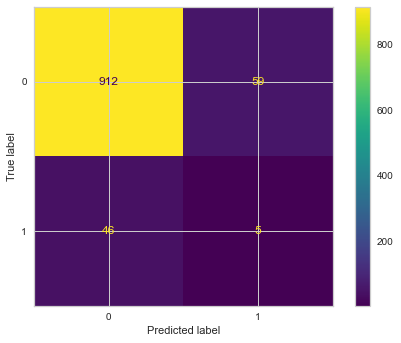

In [234]:
y_pred =svm_model_grid.predict(X_test_scaled)
y_train_pred = svm_model_grid.predict(X_train_scaled)

svm_grid_f1 = f1_score(y_test, y_pred)
svm_grid_acc = accuracy_score(y_test, y_pred)
svm_grid_recall = recall_score(y_test, y_pred)
svm_grid_auc = roc_auc_score(y_test, y_pred)

print('-----------CONFUSION MATRIX------------')
print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print('-----------CLASSIFICATION REPORT---------')
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(svm_model_grid, X_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

### 6.2.d ROC (Receiver Operating Curve) and AUC (Area Under Curve)

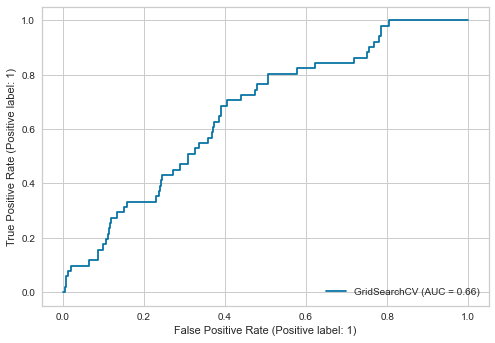

In [236]:
plot_roc_curve(svm_model_grid, X_test_scaled, y_test);

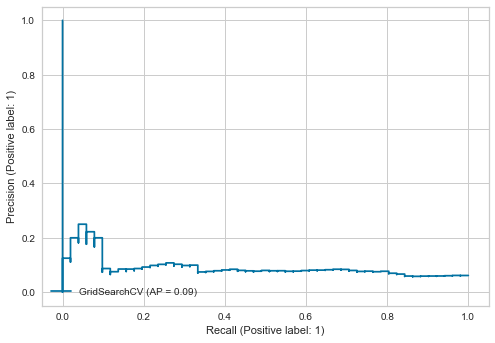

In [237]:
plot_precision_recall_curve(svm_model_grid, X_test_scaled, y_test);

## 6.3 The Implementation of Decision Tree (DT) 

### 6.3.a Modelling Decision Tree (DT) with Default Parameters

[[916  55]
 [ 42   9]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       971
           1       0.14      0.18      0.16        51

    accuracy                           0.91      1022
   macro avg       0.55      0.56      0.55      1022
weighted avg       0.92      0.91      0.91      1022

--------------------------------------------------------


train_set  test_set
Accuracy       1.000     0.905
Precision      1.000     0.141
Recall         1.000     0.176
f1             1.000     0.157

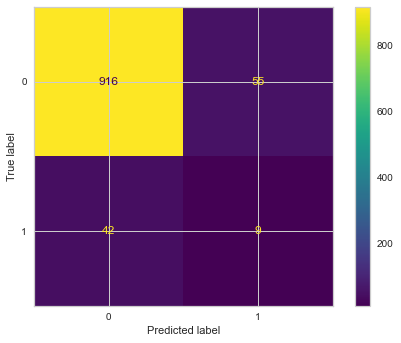

In [238]:
DT_model = DecisionTreeClassifier(class_weight="balanced", random_state=42)
DT_model.fit(X_train_scaled, y_train)
y_pred = DT_model.predict(X_test_scaled)
y_train_pred = DT_model.predict(X_train_scaled)

dt_f1 = f1_score(y_test, y_pred)
dt_acc = accuracy_score(y_test, y_pred)
dt_recall = recall_score(y_test, y_pred)
dt_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(DT_model, X_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

### 6.3.b Cross-Validating Decision Tree (DT)¶

In [239]:
dt_xvalid_model = DecisionTreeClassifier(max_depth=None, random_state=42)

dt_xvalid_model_scores = cross_validate(dt_xvalid_model, X_train_scaled, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)
dt_xvalid_model_scores = pd.DataFrame(dt_xvalid_model_scores, index = range(1, 11))

dt_xvalid_model_scores

fit_time  score_time  test_accuracy  test_precision  test_recall  test_f1
1      0.025       0.008          0.922           0.227        0.250    0.238
2      0.016       0.008          0.914           0.200        0.250    0.222
3      0.016       0.008          0.907           0.179        0.250    0.208
4      0.024       0.000          0.900           0.043        0.050    0.047
5      0.026       0.000          0.902           0.115        0.150    0.130
6      0.024       0.008          0.880           0.108        0.200    0.140
7      0.016       0.008          0.910           0.207        0.300    0.245
8      0.016       0.008          0.888           0.067        0.100    0.080
9      0.016       0.008          0.914           0.056        0.053    0.054
10     0.024       0.000          0.914           0.136        0.158    0.146

In [240]:
dt_xvalid_model_scores.mean()[2:]

test_accuracy    0.905
test_precision   0.134
test_recall      0.176
test_f1          0.151
dtype: float64

### 6.3.c Modelling Decision Tree (DT) with Best Parameters Using RandomizedsearchCV

In [241]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree

In [242]:
parameters={'max_depth':(10,20,30,40,50),'criterion':('gini','entropy'),'max_features':('log2','sqrt','auto'),
            'min_samples_split':(2,4,6),'random_state':(0,1,2,3,4,5)}

In [243]:
DT_hp=RandomizedSearchCV(tree.DecisionTreeClassifier(),param_distributions=parameters,cv=5,random_state=2)

In [244]:
DT_fit=DT_hp.fit(X_train_scaled,y_train)

#### Let's look at the best parameters & estimator found by RandomizedSearchCV.

In [245]:
from termcolor import colored
print(colored('\033[1mBest Parameters of RandomizedSearchCV for Decision Tree Model:\033[0m', 'blue'), colored(DT_hp.best_params_, 'green'))
print("--------------------------------------------------------------------------------------------------------------------")
print(colored('\033[1mBest Estimator of RandomizedSearchCV for Decision Tree Model:\033[0m', 'blue'), colored(DT_hp.best_estimator_, 'green'))

Best Parameters of RandomizedSearchCV for Decision Tree Model: {'random_state': 2, 'min_samples_split': 6, 'max_features': 'auto', 'max_depth': 10, 'criterion': 'entropy'}
--------------------------------------------------------------------------------------------------------------------
Best Estimator of RandomizedSearchCV for Decision Tree Model: DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='auto',
                       min_samples_split=6, random_state=2)


In [246]:
model_after_ht=tree.DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='auto',
                       min_samples_split=6, random_state=2)

In [247]:
model_ht=model_after_ht.fit(X_train_scaled,y_train)

-----------CONFUSION MATRIX------------
[[964   7]
 [ 44   7]]
--------------------------------------------------------
-----------CLASSIFICATION REPORT---------
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       971
           1       0.50      0.14      0.22        51

    accuracy                           0.95      1022
   macro avg       0.73      0.57      0.59      1022
weighted avg       0.93      0.95      0.94      1022

--------------------------------------------------------
--------------Plot for Confusion_matrix------------
---------------Train vs Test Report----------------


train_set  test_set
Accuracy       0.964     0.950
Precision      0.891     0.500
Recall         0.288     0.137
f1             0.435     0.215

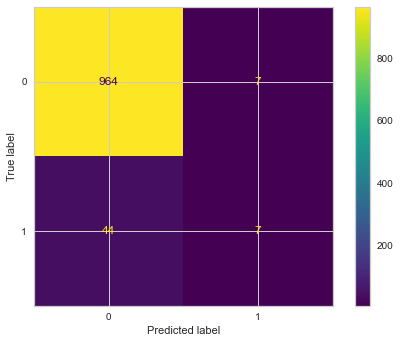

In [248]:
y_pred_DT =model_ht.predict(X_test_scaled)
y_train_pred_DT = model_ht.predict(X_train_scaled)

DT_grid_f1 = f1_score(y_test, y_pred_DT)
DT_grid_acc = accuracy_score(y_test, y_pred_DT)
DT_grid_recall = recall_score(y_test, y_pred_DT)
DT_grid_auc = roc_auc_score(y_test, y_pred_DT)

print('-----------CONFUSION MATRIX------------')
print(confusion_matrix(y_test, y_pred_DT))
print("\033[1m--------------------------------------------------------\033[0m")
print('-----------CLASSIFICATION REPORT---------')
print(classification_report(y_test, y_pred_DT))
print("\033[1m--------------------------------------------------------\033[0m")

print('--------------Plot for Confusion_matrix------------')
plot_confusion_matrix(model_ht, X_test_scaled, y_test)

print('---------------Train vs Test Report----------------')
train_val(y_train, y_train_pred_DT, y_test, y_pred_DT)

### 6.3.d Feature Importance for Decision Tree (DT) Model

In [249]:
model_ht.feature_importances_

array([0.13311152, 0.00583127, 0.22578676, 0.0697338 , 0.05739955,
       0.02045478, 0.07942023, 0.02410327, 0.1195489 , 0.20014081,
       0.06446912])

In [250]:
DT_feature_imp = pd.DataFrame(index=X.columns, data = DT_model.feature_importances_, 
                      columns = ["Feature Importance"]).sort_values("Feature Importance")
DT_feature_imp

Feature Importance
ever_married                    0.002
hypertension                    0.005
Residence_type                  0.009
heart_disease                   0.013
gender                          0.022
smoking_status                  0.033
work_type                       0.059
id                              0.132
avg_glucose_level               0.134
bmi                             0.171
age                             0.419

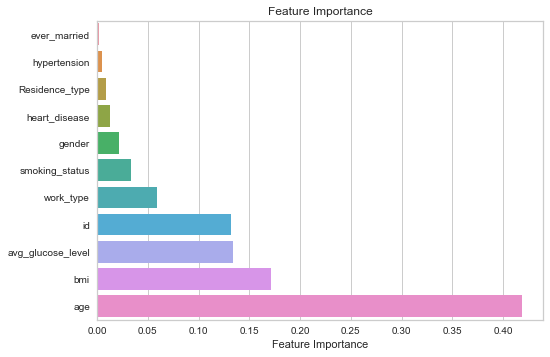

In [251]:
sns.barplot(x=DT_feature_imp["Feature Importance"], y=DT_feature_imp.index)
plt.title("Feature Importance")
plt.show()

### 6.3.e ROC (Receiver Operating Curve) and AUC (Area Under Curve)

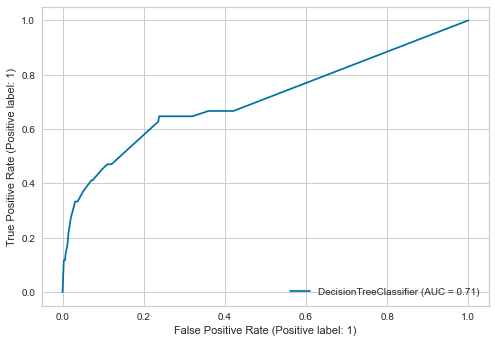

In [255]:
plot_roc_curve(model_ht, X_test_scaled, y_test);

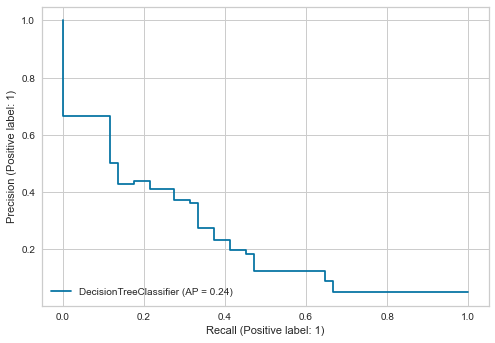

In [256]:
plot_precision_recall_curve(model_ht, X_test_scaled, y_test);

## 6.4 The Implementation of K-Nearest Neighbor (KNN)

### 6.4.a Modelling K-Nearest Neighbor (KNN) with Default Parameters

[[969   2]
 [ 50   1]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       971
           1       0.33      0.02      0.04        51

    accuracy                           0.95      1022
   macro avg       0.64      0.51      0.51      1022
weighted avg       0.92      0.95      0.93      1022

--------------------------------------------------------


train_set  test_set
Accuracy       0.955     0.949
Precision      0.826     0.333
Recall         0.096     0.020
f1             0.172     0.037

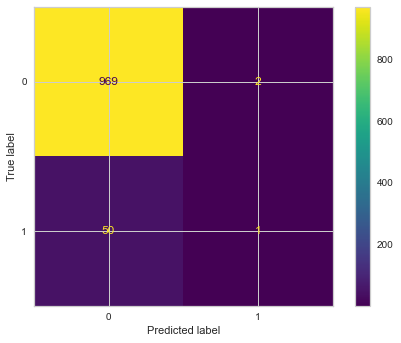

In [257]:
KNN_model = KNeighborsClassifier(n_neighbors=5,p=2,metric='euclidean')
KNN_model.fit(X_train_scaled, y_train)
y_pred_KNN = KNN_model.predict(X_test_scaled)
y_train_pred_KNN = KNN_model.predict(X_train_scaled)

knn_f1 = f1_score(y_test, y_pred_KNN)
knn_acc = accuracy_score(y_test, y_pred_KNN)
knn_recall = recall_score(y_test, y_pred_KNN)
knn_auc = roc_auc_score(y_test, y_pred_KNN)

print(confusion_matrix(y_test, y_pred_KNN))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred_KNN))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(KNN_model, X_test_scaled, y_test)

train_val(y_train, y_train_pred_KNN, y_test, y_pred_KNN)

### 6.4.b Cross-Validating K-Nearest Neighbor (KNN)

In [258]:
knn_xvalid_model = KNeighborsClassifier(n_neighbors=5)

knn_xvalid_model_scores = cross_validate(knn_xvalid_model, X_train_scaled, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)
knn_xvalid_model_scores = pd.DataFrame(knn_xvalid_model_scores, index = range(1, 11))

knn_xvalid_model_scores

fit_time  score_time  test_accuracy  test_precision  test_recall  test_f1
1      0.017       0.040          0.946           0.000        0.000    0.000
2      0.016       0.048          0.941           0.000        0.000    0.000
3      0.024       0.048          0.946           0.000        0.000    0.000
4      0.016       0.048          0.951           0.500        0.050    0.091
5      0.016       0.040          0.949           0.333        0.050    0.087
6      0.024       0.040          0.954           1.000        0.050    0.095
7      0.017       0.048          0.949           0.000        0.000    0.000
8      0.016       0.040          0.949           0.000        0.000    0.000
9      0.016       0.040          0.944           0.000        0.000    0.000
10     0.024       0.040          0.951           0.000        0.000    0.000

In [259]:
knn_xvalid_model_scores.mean()[2:]

test_accuracy    0.948
test_precision   0.183
test_recall      0.015
test_f1          0.027
dtype: float64

### 6.4.c Elbow Method for Choosing Reasonable K Values

In [260]:
test_error_rates = []


for k in range(1, 30):
    KNN_model = KNeighborsClassifier(n_neighbors=k)
    KNN_model.fit(X_train_scaled, y_train) 
   
    y_pred_Er = KNN_model.predict(X_test_scaled)
    test_error_rates.append(np.mean(y_pred_Er!=y_test))

#### Plot for Elbow Method

Text(0, 0.5, 'Error_rate')

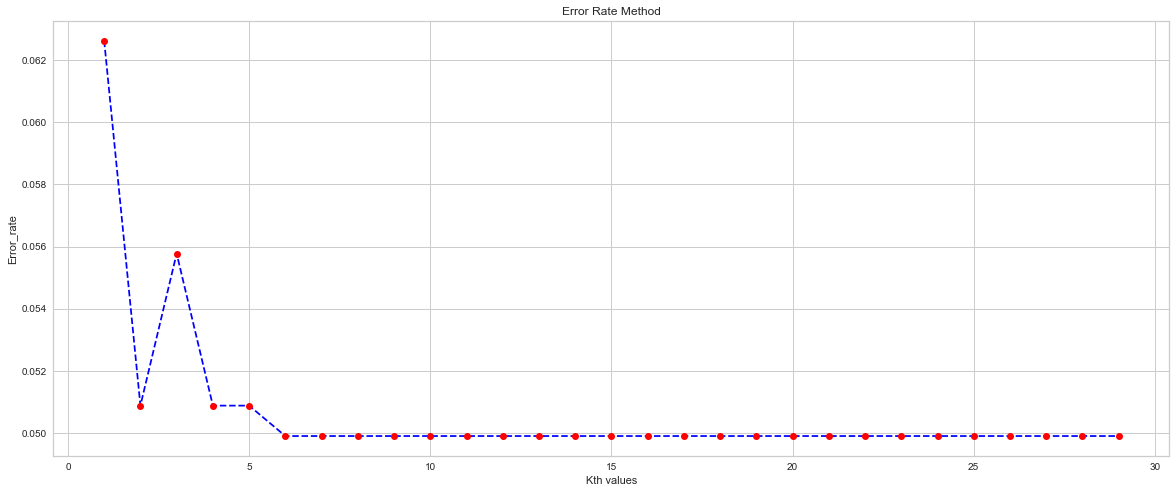

In [261]:
plt.figure(figsize=(20,8))
plt.plot(range(1,30),test_error_rates,color='blue',linestyle='dashed',marker='o',markerfacecolor='red')
plt.title("Error Rate Method")
plt.xlabel('Kth values')
plt.ylabel('Error_rate')

### 6.4.d GridsearchCV for Choosing Reasonable K Values

In [262]:
k_values= range(1, 30)
param_grid = {"n_neighbors": k_values, "p": [1, 2], "weights": ['uniform', "distance"]}

In [263]:
KNN_grid = KNeighborsClassifier()
KNN_grid_model = GridSearchCV(KNN_grid, param_grid, cv=10, scoring='accuracy')
KNN_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

#### Let's look at the best parameters & estimator found by GridSearchCV. 

In [264]:
print(colored('\033[1mBest Parameters of GridSearchCV for KNN Model:\033[0m', 'blue'), colored(KNN_grid_model.best_params_, 'cyan'))
print("--------------------------------------------------------------------------------------------------------------------")
print(colored('\033[1mBest Estimator of GridSearchCV for KNN Model:\033[0m', 'blue'), colored(KNN_grid_model.best_estimator_, 'cyan'))

Best Parameters of GridSearchCV for KNN Model: {'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}
--------------------------------------------------------------------------------------------------------------------
Best Estimator of GridSearchCV for KNN Model: KNeighborsClassifier(n_neighbors=7)


WITH K=7
-------------------
[[971   0]
 [ 51   0]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       971
           1       0.00      0.00      0.00        51

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

--------------------------------------------------------


train_set  test_set
Accuracy       0.954     0.950
Precision      0.833     0.000
Recall         0.051     0.000
f1             0.095     0.000

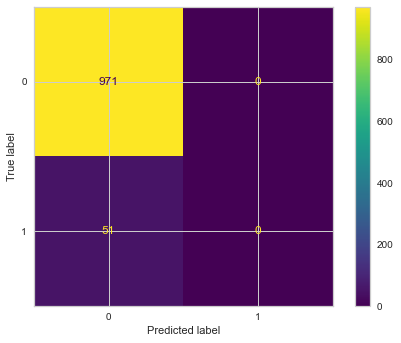

In [265]:
# NOW WITH K=7

KNN_model = KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(X_train_scaled, y_train)
y_pred_ER = KNN_model.predict(X_test_scaled)
y_train_pred_ER = KNN_model.predict(X_train_scaled)

knn26_f1 = f1_score(y_test, y_pred_ER)
knn26_acc = accuracy_score(y_test, y_pred_ER)
knn26_recall = recall_score(y_test, y_pred_ER)
knn26_auc = roc_auc_score(y_test, y_pred_ER)

print('WITH K=7')
print('-------------------')
print(confusion_matrix(y_test,y_pred_ER))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test,y_pred_ER))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(KNN_model, X_test_scaled, y_test)

train_val(y_train, y_train_pred_ER, y_test, y_pred_ER)

### 6.4.e ROC (Receiver Operating Curve) and AUC (Area Under Curve)

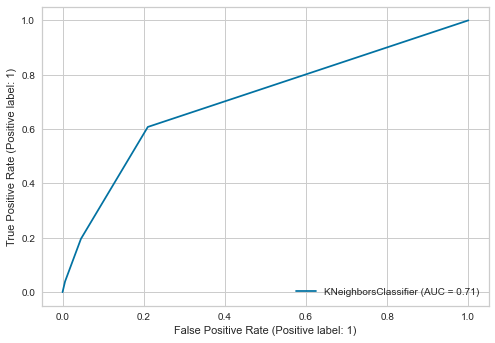

In [266]:
plot_roc_curve(KNN_model, X_test_scaled, y_test);

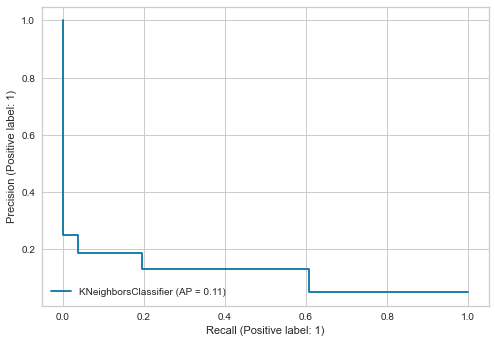

In [267]:
plot_precision_recall_curve(KNN_model, X_test_scaled, y_test);

## 6.5 The Implementation of GradientBoosting (GB)

### 6.5.a Modelling GradientBoosting (GB) with Default Parameters

<IPython.core.display.Javascript object>

[[966   5]
 [ 50   1]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       971
           1       0.17      0.02      0.04        51

    accuracy                           0.95      1022
   macro avg       0.56      0.51      0.50      1022
weighted avg       0.91      0.95      0.93      1022

--------------------------------------------------------


train_set  test_set
Accuracy       0.961     0.946
Precision      0.974     0.167
Recall         0.192     0.020
f1             0.321     0.035

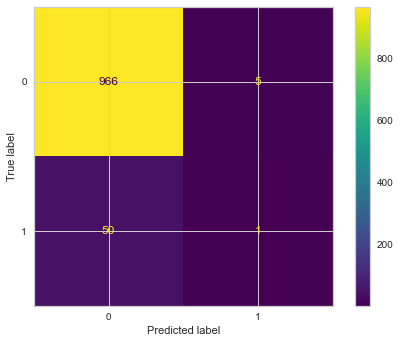

In [268]:
GB_model = GradientBoostingClassifier(random_state=42)
GB_model.fit(X_train_scaled, y_train)
y_pred = GB_model.predict(X_test_scaled)
y_train_pred = GB_model.predict(X_train_scaled)

gb_f1 = f1_score(y_test, y_pred)
gb_acc = accuracy_score(y_test, y_pred)
gb_recall = recall_score(y_test, y_pred)
gb_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(GB_model, X_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

#### Cross-checking the model by predictions in Train Set for consistency

[[3889    1]
 [ 160   38]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3890
           1       0.97      0.19      0.32       198

    accuracy                           0.96      4088
   macro avg       0.97      0.60      0.65      4088
weighted avg       0.96      0.96      0.95      4088

--------------------------------------------------------


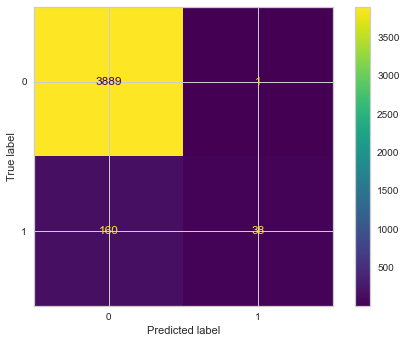

In [269]:
y_train_pred = GB_model.predict(X_train_scaled)

print(confusion_matrix(y_train, y_train_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_train, y_train_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(GB_model, X_train_scaled, y_train);

### 6.5.b Cross-Validating GradientBoosting (GB)

In [270]:
gb_xvalid_model = GradientBoostingClassifier(random_state=42)

gb_xvalid_model_scores = cross_validate(gb_xvalid_model, X_train_scaled, y_train, scoring = ["accuracy", "precision_macro", "recall_macro", "f1_macro"], cv = 10)
gb_xvalid_model_scores = pd.DataFrame(gb_xvalid_model_scores, index = range(1, 11))

gb_xvalid_model_scores

<IPython.core.display.Javascript object>

fit_time  score_time  test_accuracy  test_precision_macro  \
1      0.787       0.008          0.954                 0.977   
2      0.788       0.008          0.956                 0.978   
3      0.943       0.049          0.954                 0.811   
4      1.080       0.008          0.954                 0.811   
5      1.158       0.008          0.951                 0.728   
6      0.843       0.008          0.949                 0.475   
7      0.785       0.008          0.946                 0.602   
8      0.773       0.008          0.946                 0.602   
9      0.830       0.008          0.956                 0.978   
10     0.801       0.008          0.946                 0.477   

    test_recall_macro  test_f1_macro  
1               0.525          0.536  
2               0.550          0.580  
3               0.549          0.575  
4               0.549          0.575  
5               0.547          0.571  
6               0.499          0.487  
7               0.521          0.528  
8               0.521          0.528  
9               0.526          0.539  
10              0.496          0.486

In [271]:
gb_xvalid_model_scores.mean()

fit_time               0.879
score_time             0.012
test_accuracy          0.951
test_precision_macro   0.744
test_recall_macro      0.528
test_f1_macro          0.540
dtype: float64

### 6.5.c Feature Importance for GradientBoosting (GB) Model 

In [272]:
GB_model.feature_importances_

array([0.20001838, 0.00384661, 0.35317492, 0.02595992, 0.02873132,
       0.00608496, 0.06448584, 0.00375002, 0.12379522, 0.17451035,
       0.01564246])

In [273]:
GB_feature_imp = pd.DataFrame(index = X.columns, data = GB_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
GB_feature_imp

Feature Importance
age                             0.353
id                              0.200
bmi                             0.175
avg_glucose_level               0.124
work_type                       0.064
heart_disease                   0.029
hypertension                    0.026
smoking_status                  0.016
ever_married                    0.006
gender                          0.004
Residence_type                  0.004

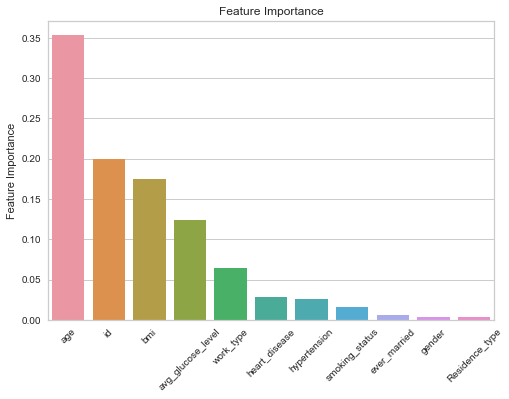

In [274]:
sns.barplot(y=GB_feature_imp["Feature Importance"], x=GB_feature_imp.index)
plt.title("Feature Importance")
plt.xticks(rotation=45)
plt.show()

### 6.5.d Modelling GradientBoosting (GB) Model with Best Parameters Using GridSeachCV

In [275]:
# Computing the accuracy scores on train and validation sets when training with different learning rates

learning_rates = [0.05, 0.1, 0.15, 0.25, 0.5, 0.6, 0.75, 0.85, 1]

for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, random_state=42)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (test): {0:.3f}".format(gb.score(X_test, y_test)))
    print()

<IPython.core.display.Javascript object>

Learning rate:  0.05
Accuracy score (training): 0.952
Accuracy score (test): 0.950



<IPython.core.display.Javascript object>

Learning rate:  0.1
Accuracy score (training): 0.955
Accuracy score (test): 0.951



<IPython.core.display.Javascript object>

Learning rate:  0.15
Accuracy score (training): 0.956
Accuracy score (test): 0.949



<IPython.core.display.Javascript object>

Learning rate:  0.25
Accuracy score (training): 0.958
Accuracy score (test): 0.948



<IPython.core.display.Javascript object>

Learning rate:  0.5
Accuracy score (training): 0.963
Accuracy score (test): 0.944



<IPython.core.display.Javascript object>

Learning rate:  0.6
Accuracy score (training): 0.961
Accuracy score (test): 0.939



<IPython.core.display.Javascript object>

Learning rate:  0.75
Accuracy score (training): 0.963
Accuracy score (test): 0.942



<IPython.core.display.Javascript object>

Learning rate:  0.85
Accuracy score (training): 0.959
Accuracy score (test): 0.941



<IPython.core.display.Javascript object>

Learning rate:  1
Accuracy score (training): 0.961
Accuracy score (test): 0.938



In [276]:
param_grid = {"n_estimators":[100, 200, 300],
             "subsample":[0.5, 1], "max_features" : [None, 2, 3, 4], "learning_rate": [0.2, 0.5, 0.6, 0.75, 0.85, 1.0, 1.25, 1.5]}

In [277]:
GB_grid_model = GradientBoostingClassifier(random_state=42)

GB_grid_model = GridSearchCV(GB_grid_model, param_grid, scoring = "f1", verbose=2, n_jobs = -1).fit(X_train, y_train)

<IPython.core.display.Javascript object>

Fitting 5 folds for each of 192 candidates, totalling 960 fits


#### Let's look at the best parameters & estimator found by GridSearchCV.

In [278]:
print(colored('\033[1mBest Parameters of GridSearchCV for Gradient Boosting Model:\033[0m', 'blue'), colored(GB_grid_model.best_params_, 'cyan'))
print("--------------------------------------------------------------------------------------------------------------------")
print(colored('\033[1mBest Estimator of GridSearchCV for Gradient Boosting Model:\033[0m', 'blue'), colored(GB_grid_model.best_estimator_, 'cyan'))

Best Parameters of GridSearchCV for Gradient Boosting Model: {'learning_rate': 1.0, 'max_features': 2, 'n_estimators': 100, 'subsample': 1}
--------------------------------------------------------------------------------------------------------------------
Best Estimator of GridSearchCV for Gradient Boosting Model: GradientBoostingClassifier(learning_rate=1.0, max_features=2, random_state=42,
                           subsample=1)


[[900  71]
 [ 36  15]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       971
           1       0.17      0.29      0.22        51

    accuracy                           0.90      1022
   macro avg       0.57      0.61      0.58      1022
weighted avg       0.92      0.90      0.91      1022

--------------------------------------------------------


train_set  test_set
Accuracy       0.893     0.895
Precision      0.123     0.174
Recall         0.197     0.294
f1             0.151     0.219

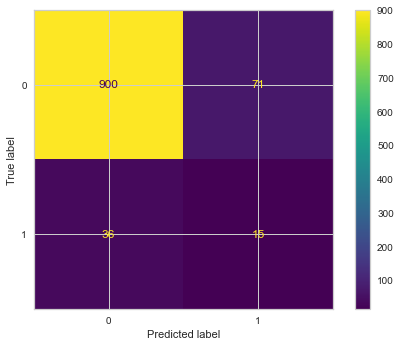

In [279]:
y_pred = GB_grid_model.predict(X_test_scaled)
y_train_pred = GB_grid_model.predict(X_train_scaled)

gb_grid_f1 = f1_score(y_test, y_pred)
gb_grid_acc = accuracy_score(y_test, y_pred)
gb_grid_recall = recall_score(y_test, y_pred)
gb_grid_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(GB_grid_model, X_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

### 6.5.e ROC (Receiver Operating Curve) and AUC (Area Under Curve)

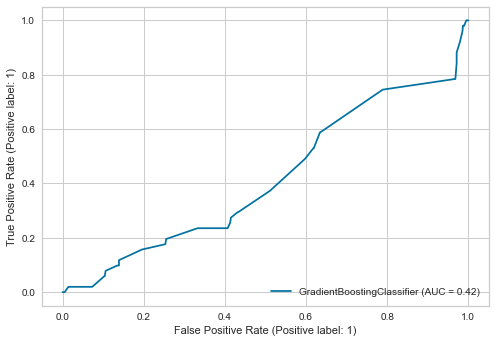

In [280]:
plot_roc_curve(GB_model, X_test, y_test);

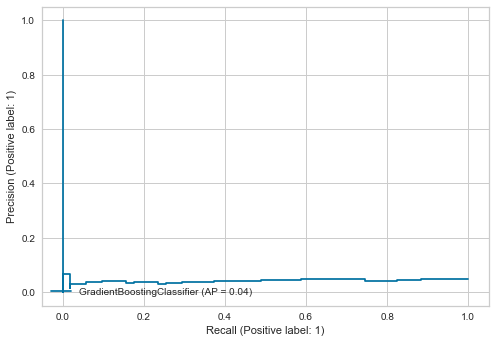

In [281]:
plot_precision_recall_curve(GB_model, X_test, y_test);

## 6.6 The Implementation of AdaBoosting (AB)

### 6.6.a Modelling AdaBoostingBoosting (AB) with Default Parameters & Model Performance

[[966   5]
 [ 48   3]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       971
           1       0.38      0.06      0.10        51

    accuracy                           0.95      1022
   macro avg       0.66      0.53      0.54      1022
weighted avg       0.92      0.95      0.93      1022

--------------------------------------------------------


train_set  test_set
Accuracy       0.953     0.948
Precision      0.619     0.375
Recall         0.066     0.059
f1             0.119     0.102

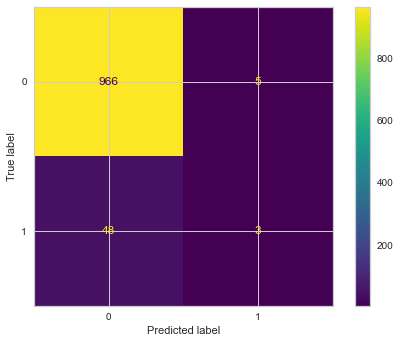

In [282]:
AB_model = AdaBoostClassifier(n_estimators=50, random_state=101)
AB_model.fit(X_train, y_train)
y_pred = AB_model.predict(X_test)
y_train_pred = AB_model.predict(X_train)

ab_f1 = f1_score(y_test, y_pred)
ab_acc = accuracy_score(y_test, y_pred)
ab_recall = recall_score(y_test, y_pred)
ab_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(AB_model, X_test, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

#### Cross-checking the model by predictions in Train Set for consistency

[[3882    8]
 [ 185   13]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      3890
           1       0.62      0.07      0.12       198

    accuracy                           0.95      4088
   macro avg       0.79      0.53      0.55      4088
weighted avg       0.94      0.95      0.93      4088

--------------------------------------------------------


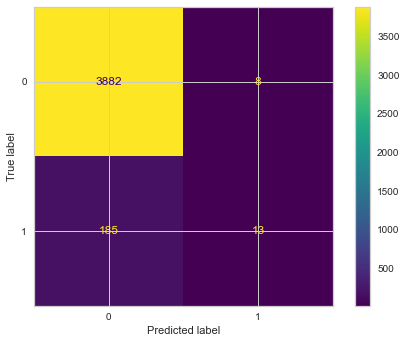

In [75]:
y_train_pred = AB_model.predict(X_train)

print(confusion_matrix(y_train, y_train_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_train, y_train_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(AB_model, X_train, y_train);

### 6.6.b Cross-Validating AdaBoostingBoosting (AB)

In [283]:
ab_xvalid_model = AdaBoostClassifier(n_estimators=50, random_state=101)

ab_xvalid_model_scores = cross_validate(ab_xvalid_model, X_train, y_train, scoring = ['accuracy', 'precision','recall', 'f1'], cv = 10)
ab_xvalid_model_scores = pd.DataFrame(ab_xvalid_model_scores, index = range(1, 11))

ab_xvalid_model_scores

fit_time  score_time  test_accuracy  test_precision  test_recall  test_f1
1      0.441       0.024          0.954           0.667        0.100    0.174
2      0.267       0.016          0.951           0.500        0.050    0.091
3      0.273       0.025          0.951           0.500        0.050    0.091
4      0.273       0.016          0.949           0.000        0.000    0.000
5      0.280       0.026          0.956           1.000        0.100    0.182
6      0.282       0.016          0.949           0.000        0.000    0.000
7      0.304       0.016          0.951           0.500        0.050    0.091
8      0.361       0.016          0.944           0.000        0.000    0.000
9      0.337       0.016          0.951           0.000        0.000    0.000
10     0.362       0.024          0.949           0.000        0.000    0.000

In [284]:
ab_xvalid_model_scores.mean()

fit_time         0.318
score_time       0.019
test_accuracy    0.950
test_precision   0.317
test_recall      0.035
test_f1          0.063
dtype: float64

### 6.6.c The Visualization of the Tree

In [285]:
AB_model = AdaBoostClassifier(n_estimators=3, random_state=42)
AB_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=3, random_state=42)

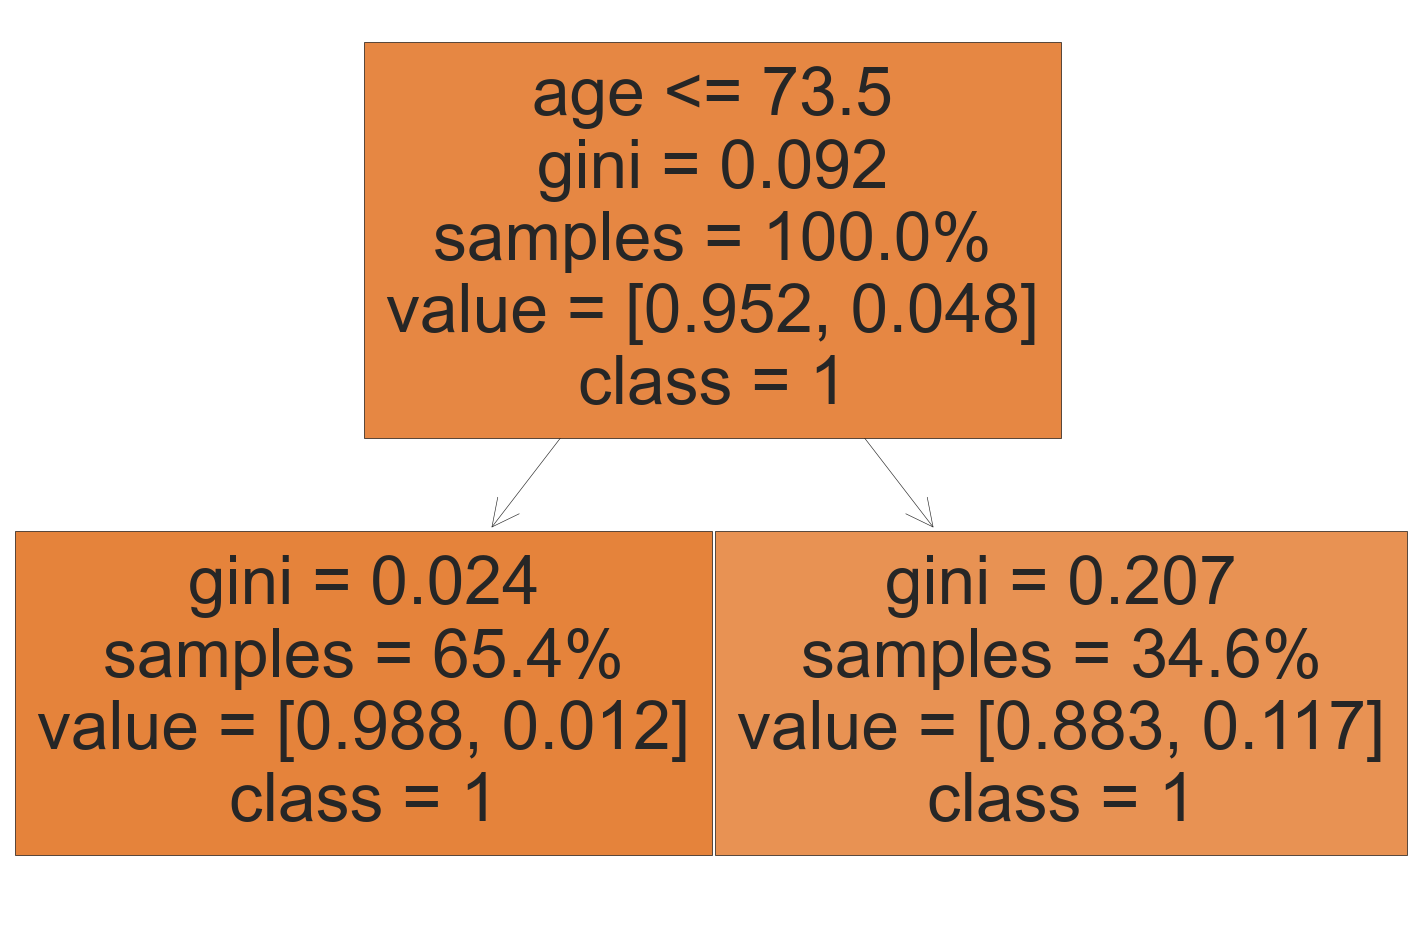

In [286]:
features = list(X.columns)
targets = df["stroke"].astype("str")

plt.figure(figsize=(12, 8),dpi=150)
plot_tree(AB_model.estimators_[0], filled=True, feature_names=features, class_names=targets.unique(), proportion=True);

### 6.6.d Analyzing Performance While Weak Learners Are Added

In [287]:
error_rates = []

for n in range(1, 100):
    
    AB_model = AdaBoostClassifier(n_estimators=n)
    AB_model.fit(X_train, y_train)
    preds = AB_model.predict(X_test)
    err = 1 - f1_score(y_test, preds)
    
    error_rates.append(err)

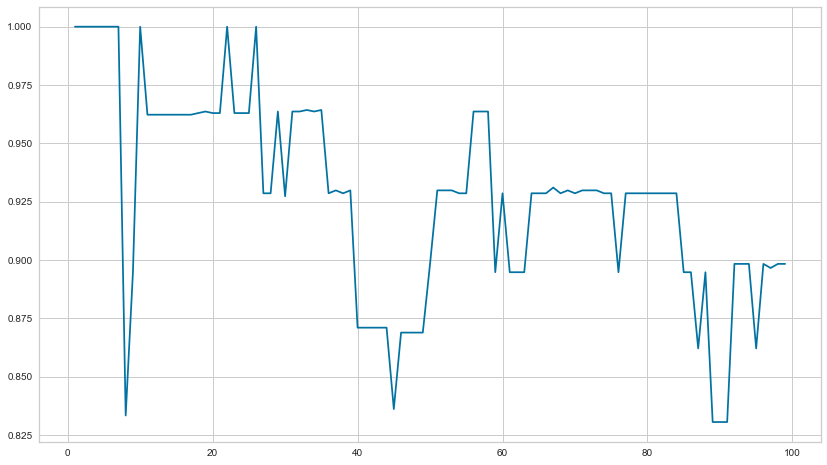

In [288]:
plt.figure(figsize=(14, 8))
plt.plot(range(1, 100), error_rates);

### 6.6.e Feature Importance for AdaBoostingBoosting (AB) Mode

In [289]:
AB_model.feature_importances_

array([0.33333333, 0.01010101, 0.19191919, 0.01010101, 0.        ,
       0.        , 0.01010101, 0.        , 0.27272727, 0.16161616,
       0.01010101])

In [290]:
AB_feature_imp = pd.DataFrame(index = X.columns, data = AB_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
AB_feature_imp

Feature Importance
id                              0.333
avg_glucose_level               0.273
age                             0.192
bmi                             0.162
gender                          0.010
hypertension                    0.010
work_type                       0.010
smoking_status                  0.010
heart_disease                   0.000
ever_married                    0.000
Residence_type                  0.000

In [291]:
imp_feats = AB_feature_imp.sort_values("Feature Importance")

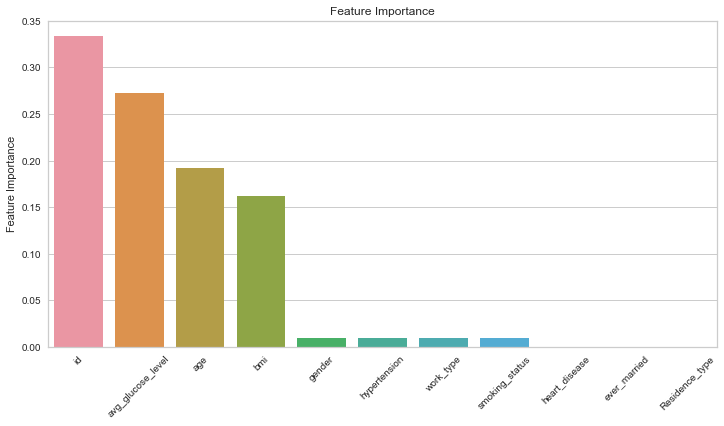

In [292]:
plt.figure(figsize=(12,6))

sns.barplot(y=AB_feature_imp["Feature Importance"], x=AB_feature_imp.index)

plt.title("Feature Importance")
plt.xticks(rotation=45)
plt.show()

### 6.6.f  Modelling AdaBoosting (AB) with Best Parameters Using GridSearchCV

In [293]:
# Computing the accuracy scores on train and validation sets when training with different learning rates

learning_rates = [0.05, 0.1, 0.15, 0.25, 0.5, 0.6, 0.75, 0.85, 1]

for learning_rate in learning_rates:
    ab = AdaBoostClassifier(n_estimators=20, learning_rate = learning_rate, random_state=42)
    ab.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(ab.score(X_train, y_train)))
    print("Accuracy score (test): {0:.3f}".format(ab.score(X_test, y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.952
Accuracy score (test): 0.950

Learning rate:  0.1
Accuracy score (training): 0.952
Accuracy score (test): 0.950

Learning rate:  0.15
Accuracy score (training): 0.952
Accuracy score (test): 0.950

Learning rate:  0.25
Accuracy score (training): 0.952
Accuracy score (test): 0.950

Learning rate:  0.5
Accuracy score (training): 0.952
Accuracy score (test): 0.950

Learning rate:  0.6
Accuracy score (training): 0.952
Accuracy score (test): 0.950

Learning rate:  0.75
Accuracy score (training): 0.952
Accuracy score (test): 0.949

Learning rate:  0.85
Accuracy score (training): 0.952
Accuracy score (test): 0.949

Learning rate:  1
Accuracy score (training): 0.951
Accuracy score (test): 0.949



In [294]:
param_grid = {"n_estimators": [15, 20, 100, 500], "learning_rate": [0.2, 0.5, 0.6, 0.75, 0.85, 1.0, 1.25, 1.5]}

In [295]:
AB_grid_model = AdaBoostClassifier(random_state=42)
AB_grid_model = GridSearchCV(AB_grid_model, param_grid, cv=5, scoring= 'f1')

In [296]:
AB_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'learning_rate': [0.2, 0.5, 0.6, 0.75, 0.85, 1.0, 1.25,
                                           1.5],
                         'n_estimators': [15, 20, 100, 500]},
             scoring='f1')

#### Let's look at the best parameters & estimator found by GridSearchCV.

In [297]:
print(colored('\033[1mBest Parameters of GridSearchCV for AdaBoosting Model:\033[0m', 'blue'), colored(AB_grid_model.best_params_, 'cyan'))
print("--------------------------------------------------------------------------------------------------------------------")
print(colored('\033[1mBest Estimator of GridSearchCV for AdaBoosting Model:\033[0m', 'blue'), colored(AB_grid_model.best_estimator_, 'cyan'))

Best Parameters of GridSearchCV for AdaBoosting Model: {'learning_rate': 1.25, 'n_estimators': 500}
--------------------------------------------------------------------------------------------------------------------
Best Estimator of GridSearchCV for AdaBoosting Model: AdaBoostClassifier(learning_rate=1.25, n_estimators=500, random_state=42)


[[962   9]
 [ 48   3]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       971
           1       0.25      0.06      0.10        51

    accuracy                           0.94      1022
   macro avg       0.60      0.52      0.53      1022
weighted avg       0.92      0.94      0.93      1022

--------------------------------------------------------


train_set  test_set
Accuracy       0.958     0.944
Precision      0.719     0.250
Recall         0.232     0.059
f1             0.351     0.095

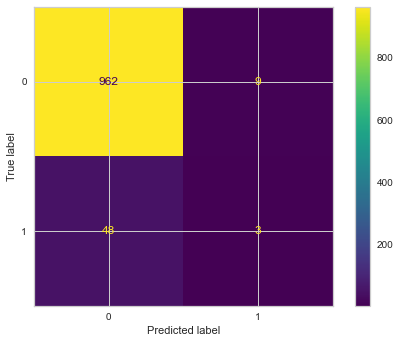

In [298]:
y_pred = AB_grid_model.predict(X_test)
y_train_pred = AB_grid_model.predict(X_train)

ab_grid_f1 = f1_score(y_test, y_pred)
ab_grid_acc = accuracy_score(y_test, y_pred)
ab_grid_recall = recall_score(y_test, y_pred)
ab_grid_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(AB_grid_model, X_test, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

[[3872   18]
 [ 152   46]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3890
           1       0.72      0.23      0.35       198

    accuracy                           0.96      4088
   macro avg       0.84      0.61      0.66      4088
weighted avg       0.95      0.96      0.95      4088

--------------------------------------------------------


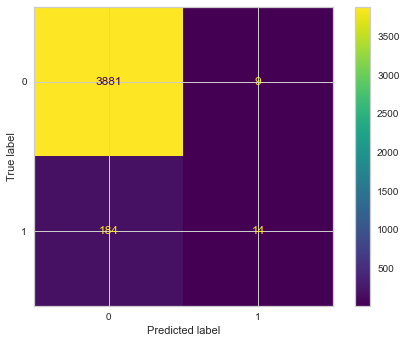

In [299]:
y_train_pred = AB_grid_model.predict(X_train)

print(confusion_matrix(y_train, y_train_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_train, y_train_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(AB_model, X_train, y_train);

### 6.6.g ROC (Receiver Operating Curve) and AUC (Area Under Curve)

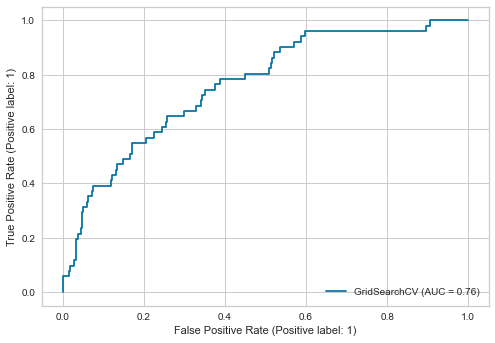

In [300]:
plot_roc_curve(AB_grid_model, X_test, y_test);

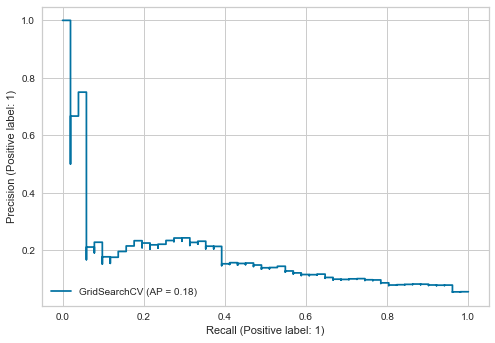

In [301]:
plot_precision_recall_curve(AB_grid_model, X_test, y_test);

## 6.7 The Implementation of XGBoosting (XGB) 

### 6.7.a Modelling XGBoosting (XGB) with Default Parameters & Model Performance

[16:13:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[964   7]
 [ 49   2]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       971
           1       0.22      0.04      0.07        51

    accuracy                           0.95      1022
   macro avg       0.59      0.52      0.52      1022
weighted avg       0.92      0.95      0.93      1022

--------------------------------------------------------


train_set  test_set
Accuracy       1.000     0.945
Precision      1.000     0.222
Recall         0.990     0.039
f1             0.995     0.067

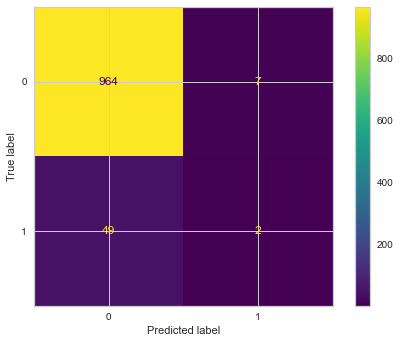

In [302]:
XGB_model = XGBClassifier(random_state=101)
XGB_model.fit(X_train_scaled, y_train)
y_pred = XGB_model.predict(X_test_scaled)
y_train_pred = XGB_model.predict(X_train_scaled)

xgb_f1 = f1_score(y_test, y_pred)
xgb_acc = accuracy_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(XGB_model, X_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

### 6.7.b Cross-Validating XGBoosting (XGB)

In [303]:
xgb_xvalid_model = XGBClassifier(random_state=101)

xgb_xvalid_model_scores = cross_validate(xgb_xvalid_model, X_train_scaled, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)
xgb_xvalid_model_scores = pd.DataFrame(xgb_xvalid_model_scores, index = range(1, 11))

xgb_xvalid_model_scores

[16:17:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:17:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:17:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:17:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

fit_time  score_time  test_accuracy  test_precision  test_recall  test_f1
1      0.329       0.008          0.946           0.333        0.100    0.154
2      0.305       0.009          0.941           0.250        0.100    0.143
3      0.268       0.010          0.944           0.286        0.100    0.148
4      0.281       0.010          0.936           0.000        0.000    0.000
5      0.309       0.009          0.949           0.400        0.100    0.160
6      0.254       0.010          0.946           0.000        0.000    0.000
7      0.255       0.011          0.946           0.000        0.000    0.000
8      0.258       0.008          0.946           0.250        0.050    0.083
9      0.259       0.008          0.953           0.500        0.053    0.095
10     0.255       0.008          0.946           0.000        0.000    0.000

In [304]:
xgb_xvalid_model_scores.mean()

fit_time         0.277
score_time       0.009
test_accuracy    0.945
test_precision   0.202
test_recall      0.050
test_f1          0.078
dtype: float64

### 6.7.c Feature Importance for XGBoosting (XGB) Model

In [305]:
XGB_model.feature_importances_ 

array([0.07376923, 0.07833973, 0.15540211, 0.08377615, 0.0819815 ,
       0.11416472, 0.09987317, 0.07065262, 0.07358018, 0.08606581,
       0.08239476], dtype=float32)

In [306]:
feats = pd.DataFrame(index=X.columns, data=XGB_model.feature_importances_, columns=["Feature Importance"])
XGB_feature_imp = feats.sort_values("Feature Importance", ascending=False)

XGB_feature_imp

Feature Importance
age                             0.155
ever_married                    0.114
work_type                       0.100
bmi                             0.086
hypertension                    0.084
smoking_status                  0.082
heart_disease                   0.082
gender                          0.078
id                              0.074
avg_glucose_level               0.074
Residence_type                  0.071

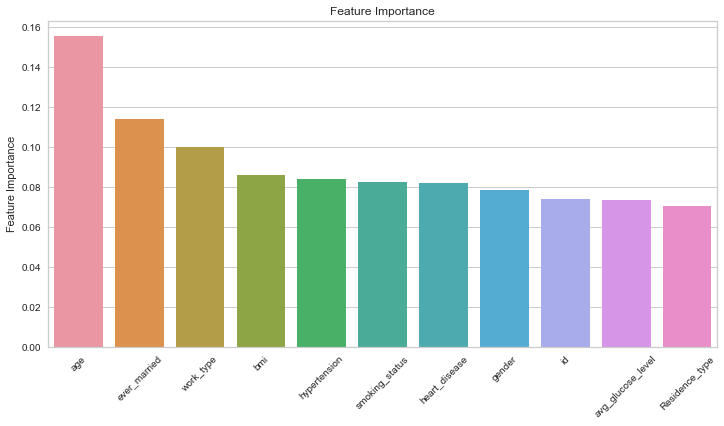

In [307]:
plt.figure(figsize=(12,6))
sns.barplot(y=XGB_feature_imp["Feature Importance"], x=XGB_feature_imp.index)

plt.title("Feature Importance")
plt.xticks(rotation=45)
plt.show()

### 6.7.d Modelling XGBoosting (XGB) with Best Parameters Using GridSearchCV

In [311]:
param_grid = {"n_estimators":[100, 300], 
              "max_depth":[3,5,6], 
              "learning_rate": [0.1, 0.3],
              "subsample":[0.5, 1], 
              "colsample_bytree":[0.5, 1]}

In [312]:
XGB_grid_model = XGBClassifier(random_state=42)
XGB_grid_model = GridSearchCV(XGB_grid_model, param_grid, scoring = "f1", verbose=2, n_jobs = -1)

In [313]:
XGB_grid_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[16:24:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_est...=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                              

#### Let's look at the best parameters & estimator found by GridSearchCV.

In [314]:
print(colored('\033[1mBest Parameters of GridSearchCV for RF Model:\033[0m', 'blue'), colored(XGB_grid_model.best_params_, 'cyan'))
print("--------------------------------------------------------------------------------------------------------------------")
print(colored('\033[1mBest Estimator of GridSearchCV for RF Model:\033[0m', 'blue'), colored(XGB_grid_model.best_estimator_, 'cyan'))

Best Parameters of GridSearchCV for RF Model: {'colsample_bytree': 0.5, 'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.5}
--------------------------------------------------------------------------------------------------------------------
Best Estimator of GridSearchCV for RF Model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.5, tree_method='exact', validate_parameters=1,
              verbosity=None)


[[965   6]
 [ 49   2]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       971
           1       0.25      0.04      0.07        51

    accuracy                           0.95      1022
   macro avg       0.60      0.52      0.52      1022
weighted avg       0.92      0.95      0.93      1022

--------------------------------------------------------


train_set  test_set
Accuracy       0.993     0.946
Precision      1.000     0.250
Recall         0.854     0.039
f1             0.921     0.068

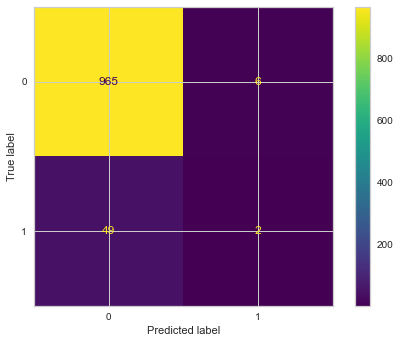

In [315]:
y_pred = XGB_grid_model.predict(X_test_scaled)
y_train_pred = XGB_grid_model.predict(X_train_scaled)

xgb_grid_f1 = f1_score(y_test, y_pred)
xgb_grid_acc = accuracy_score(y_test, y_pred)
xgb_grid_recall = recall_score(y_test, y_pred)
xgb_grid_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(XGB_grid_model, X_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

### 6.7.e ROC (Receiver Operating Curve) and AUC (Area Under Curve)

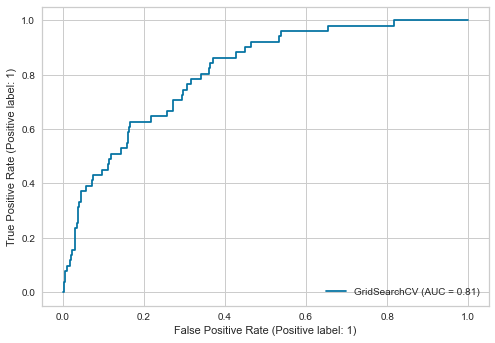

In [316]:
plot_roc_curve(XGB_grid_model, X_test_scaled, y_test);

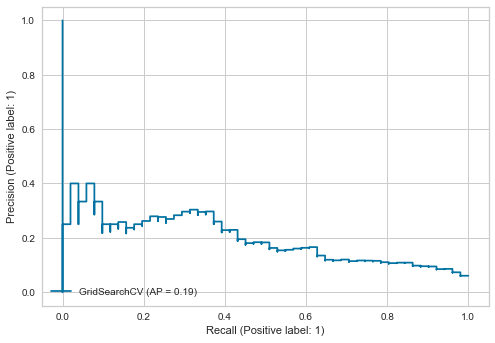

In [317]:
plot_precision_recall_curve(XGB_grid_model, X_test_scaled, y_test);

## 7) THE COMPARISON OF MODELS

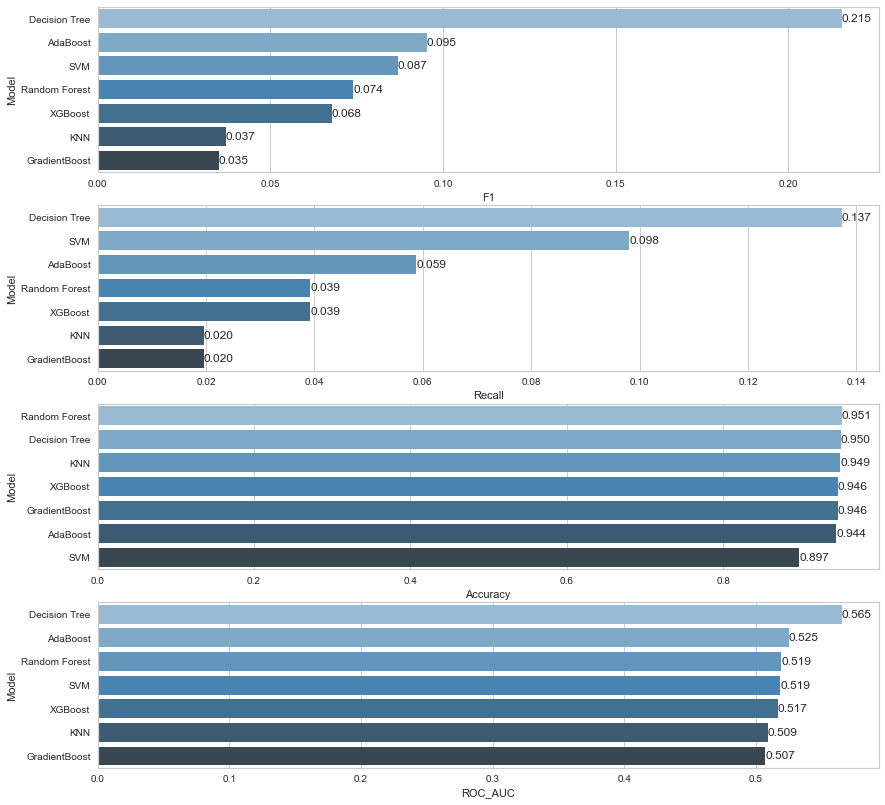

In [318]:
compare = pd.DataFrame({"Model": [ "SVM", "KNN", "Decision Tree", "Random Forest", "AdaBoost", "GradientBoost", "XGBoost"],
                        "F1": [ svm_grid_f1, knn_f1, DT_grid_f1, rf_grid_f1, ab_grid_f1, gb_f1, xgb_grid_f1],
                        "Recall": [ svm_grid_recall, knn_recall, DT_grid_recall, rf_grid_recall, ab_grid_recall, gb_recall, xgb_grid_recall],
                        "Accuracy": [ svm_grid_acc, knn_acc, DT_grid_acc, rf_grid_acc, ab_grid_acc, gb_acc, xgb_grid_acc],
                        "ROC_AUC": [ svm_grid_auc, knn_auc, DT_grid_auc, rf_grid_auc, ab_grid_auc, gb_auc, xgb_grid_auc]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,14))
plt.subplot(411)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(412)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(413)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(414)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax=sns.barplot(x="ROC_AUC", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.show()

# CONCLUSION

### In this Project Respectively,  We have tried to a predict classification problem in Stroke Dataset by a variety of models to classify Stroke predictions in the context of determining whether anybody is likely to get Stroke based on the input parameters like gender, age and various test results or not  We have made the detailed exploratory analysis (EDA).  missing values are removed in the Dataset by using Simple Imputer with Median We have decided which metrics will be used. We have analysed both target and features in detail. We have transformed categorical variables into integer by using Label Encoder, so we can use them in the models.  We have cross-checked the models obtained from train sets by applying cross validation for each model performance. We have examined the feature importance of some models.Lastly we have examined the results of all models visually with respect to select the best one for the problem in hand. By checking with all the scores like F1_score, Precision, Recall and Accuracy, The Decision Tree and Random Forest gives the best results while comparing with other models. For Respective Dataset the Decision Tree and Random Forest is the Best model for Future Predictions.